In [1]:
import seaborn as sns


In [2]:
import numpy as np
import sys
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplt_style_n

plt.style.use(mplt_style_n.style1)

In [3]:
import WaterQualityFunction_plot as wqfp
import WaterQualityFunction_nutrient as wqfn

In [4]:
import WaterQualityFunction_preprocessing as wqfpr

In [5]:
import util as util

In [6]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [7]:
df = pd.read_csv('govdat.csv', low_memory=False)

In [8]:
set(np.unique(df["determinand.definition"]))

{'Grain Size Fraction : 39 to 30.3 microns',
 'Styrene, Leachable :- {Vinylbenzene}',
 'Lambda-cyhalothrin : Dry Wt',
 'Di(2-ethylhexyl) phthalate :- {DEHP}',
 'Silver : Wet Wt',
 'Equiv.Carbon No >10-24, Aromatic Fraction',
 '2,4-D Iso Propyl Ester',
 'Carbophenothion : Dry Wt',
 'Diethyl Phthalate',
 'Catellicoccus Marker : Seabird Copy Number',
 'Endrin : Dry Wt',
 'Grain Size Fraction : phi 1.0 to 1.5',
 'Benzo(a)Pyrene : Dry Wt',
 'Perfluorooctanesulfonic acid (linear)',
 'Cresyldiphenyl phosphate',
 '2,3,4,6,7,8-Hexachlorodibenzofuran : Dry Wt',
 'Toluene :- {Methylbenzene}',
 'PCB - 105',
 'Copper, Leachable',
 'Norfluoxetine',
 'Lead, Dissolved',
 'Coliforms, Total : Confirmed : MF',
 'Isopropylbenzene :- {Methylethylbenzene}',
 'TDE -op : Wet Wt',
 '1,1-Dichloropropylene :- {1,1-Dichloropropene}',
 'Equiv.Carbon No >16-21',
 'Erythromycin',
 'Grain Size Fraction : phi 6.5 to 7.0',
 'Dibenzothiophenes : C2 : Wet Wt',
 'Propranolol',
 'Boron',
 'Acetone :- {Propanone}',
 'Zinc, 

In [9]:
water_properties = ['Volume of Sample Filtered',\
                   'Borehole : Depth to liquid :- {Ground level to liquid}', "River flow status", \
                    "Weather : Rainfall : Coded",\
                   'Unusual Weather Waiver (WRA)', 'Sample Depth below surface', \
                    'Salinity', 'Salinity : Calculated from Chloride', 'Salinity : In Situ','Salinity : Refractometer : Intertidal, Interstitial',\
 'Salinity, by Bench Salinometer', 'Salinity, by Conductivity',  'Time of high tide','Temperature of Water',\
 'Time of sampling relative to previous high water',  'Water Depth',
 'Water Level Below top cover',
 'Water level above OD']

In [10]:
nutrients_N = [119,111,9993,117,9853,118,6485,4925,114,116,9943,9686 ] #12 determinands linked to the Nitrogen

In [11]:
nutrients_N_name = ["Ammonia un-ionised as N", "Ammoniacal Nitrogen as N", "Ammoniacal Nitrogen, Filtered as N",\
                    "Nitrate as N","Nitrate, Filtered as N", \
                    "Nitrite as N","Nitrite, Filtered as N", \
                    "Nitrogen, Dissolved Inorganic : as N",\
                     "Nitrogen, Kjeldahl as N", \
                    "Nitrogen, Total Oxidised as N",\
                     "Nitrogen, Total Oxidised, Filtered as N", "Nitrogen, Total as N "]


# 0) subset of the dataset-time,place,water info, and nitrogen determinants

In [12]:
df.loc[:,"Date"] = pd.to_datetime(df['sample.sampleDateTime']).dt.date


In [13]:
lat = np.random.uniform(0, 10, size=(4,4))
long = np.random.uniform(0, 10, size=(4,4))

In [14]:
pointZ = [lat, long]

In [15]:
pointZ[0][0][0], pointZ[1][0][0]

(6.822588131667327, 0.5670809721524495)

In [16]:
df_sub = df.loc[(df['determinand.definition'].isin(water_properties)) | (df['determinand.definition'].isin(nutrients_N_name)) ][["sample.samplingPoint.notation", "determinand.definition","result","resultQualifier.notation", "sample.sampledMaterialType.label", "month", "yr", "Date", "lat", "lon"]]



# 1) Analysis of frequency of water definition in the catalogue

In [17]:
set(np.unique(df_sub["sample.sampledMaterialType.label"]))

{'ANY BIOTA',
 'ANY LEACHATE',
 'ANY NON-AQUEOUS LIQUID',
 'ANY SEWAGE',
 'ANY SEWAGE SLUDGE',
 'ANY SOLID/SEDIMENT - UNSPECIFIED',
 'ANY TRADE EFFLUENT',
 'ANY WATER',
 'CANAL WATER',
 'CERASTODERMA EDULE - COCKLE - WHOLE ANIMAL',
 'COASTAL / MARINE SEDIMENT',
 'COASTAL / MARINE SEDIMENT - <63UM FRACTION',
 'CRUDE SEWAGE',
 'ESTUARINE WATER',
 'ESTUARINE WATER AT HIGH TIDE',
 'ESTUARY SEDIMENT',
 'ESTUARY SEDIMENT - <63UM FRACTION',
 'ESTUARY SEDIMENT - INTER TIDAL',
 'ESTUARY SEDIMENT - INTER TIDAL - <63UM FRACTION',
 'ESTUARY SEDIMENT - SUB TIDAL',
 'FINAL SEWAGE EFFLUENT',
 'GROUNDWATER',
 'GROUNDWATER - PURGED/PUMPED/REFILLED',
 'MYTILUS EDULIS - MUSSEL - WHOLE ANIMAL',
 'OSTEREA EDULIS - NATIVE OYSTER - WHOLE ANIMAL',
 'POND / LAKE / RESERVOIR WATER',
 'PRECIPITATION',
 'RIVER / RUNNING SURFACE WATER',
 'RUNNING SURFACE WATER SEDIMENT',
 'RUNNING SURFACE WATER SEDIMENT - <63UM FRACTION',
 'SEA WATER',
 'STORM SEWER OVERFLOW DISCHARGE',
 'STORM TANK EFFLUENT',
 'SURFACE DRAINAGE',

In [18]:
df_sub.groupby(["sample.sampledMaterialType.label"]).count().sort_values(by="sample.samplingPoint.notation", ascending=False)["sample.samplingPoint.notation"]#.index.get_level_values("sample.sampledMaterialType.label")

sample.sampledMaterialType.label
RIVER / RUNNING SURFACE WATER                      481491
FINAL SEWAGE EFFLUENT                              163838
ESTUARINE WATER                                    109869
SEA WATER                                          101507
ANY TRADE EFFLUENT                                  26890
GROUNDWATER                                         21952
SURFACE DRAINAGE                                     7617
POND / LAKE / RESERVOIR WATER                        6475
ANY SEWAGE                                           4455
ANY WATER                                            3998
UNCODED                                              2628
CANAL WATER                                          2361
CRUDE SEWAGE                                         2218
TRADE EFFLUENT - FRESHWATER RETURNED ABSTRACTED      2183
COASTAL / MARINE SEDIMENT                            1278
ESTUARINE WATER AT HIGH TIDE                         1010
COASTAL / MARINE SEDIMENT - <63UM FRACT

In [19]:
water_names = df_sub.groupby(["sample.sampledMaterialType.label"]).count().sort_values(by="sample.samplingPoint.notation", ascending=False)["sample.samplingPoint.notation"].index.get_level_values("sample.sampledMaterialType.label")

In [20]:
frequency = df_sub[["yr", "sample.sampledMaterialType.label"]]

In [21]:
data = frequency.groupby(["yr","sample.sampledMaterialType.label"]).size()


In [22]:
from matplotlib import cm


In [23]:
colors = cm.rainbow(np.linspace(0, 1, len(np.unique(df_sub["sample.sampledMaterialType.label"]))))



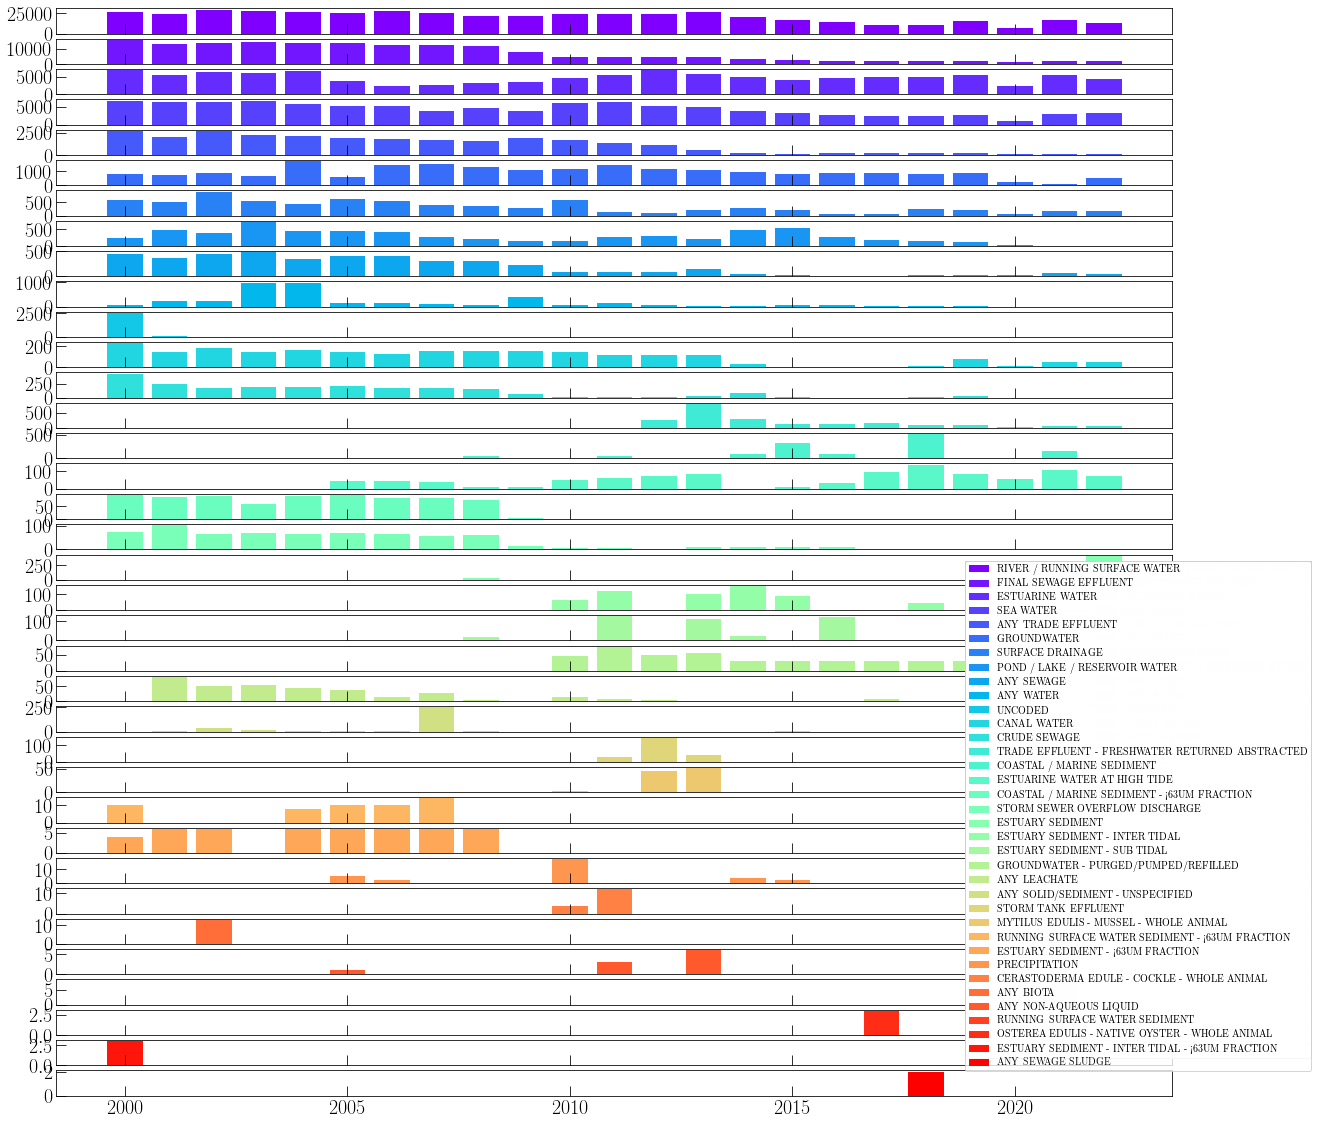

In [24]:
    fig, axes = plt.subplots(nrows=len(water_names),ncols=1, sharex=True, figsize=(20,20))
    for i in range(len(water_names)):
        axes[i].bar(data[(data.index.get_level_values("sample.sampledMaterialType.label") == \
                          water_names[i])].index.get_level_values('yr'), \
                    data.loc[(data.index.get_level_values("sample.sampledMaterialType.label") ==\
                             water_names[i])].values, label = water_names[i], color=colors[i])
        fig.legend(bbox_to_anchor=(1., .5))
        fig.set_facecolor("w")

        plt.savefig('WaterType_frequency.png', bbox_inches='tight',  transparent=False)


# 3) Pivoting the dataset to convert rows in columns

In [25]:


df_sub_piv = df_sub.pivot_table('result', ["sample.samplingPoint.notation", "sample.sampledMaterialType.label", \
                                           "month", "yr", "Date", "lat", "lon"], 'determinand.definition').reset_index().rename_axis(None, axis=1)



In [26]:
df_sub_piv = df_sub_piv.sort_values(by="Date", ascending=True)

# 4) Encoding water and season

In [27]:
df_sub_piv = df_sub_piv.rename(columns={"sample.sampledMaterialType.label": "water"})

In [28]:
df_sub_piv = df_sub_piv.rename(columns={"sample.samplingPoint.notation": "place"})

In [29]:
df_sub_piv

,place,water,month,yr,Date,lat,lon,Ammonia un-ionised as N,Ammoniacal Nitrogen as N,"Ammoniacal Nitrogen, Filtered as N",...,Sample Depth below surface,Temperature of Water,Time of high tide,Time of sampling relative to previous high water,Unusual Weather Waiver (WRA),Volume of Sample Filtered,Water Depth,Water Level Below top cover,Water level above OD,Weather : Rainfall : Coded
31913,SO-F0002151,RIVER / RUNNING SURFACE WATER,1,2000,2000-01-04,0.037124,50.914881,0.0010,0.157,NaN,...,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87609,SO-F0011446,FINAL SEWAGE EFFLUENT,1,2000,2000-01-04,-0.390159,51.139273,0.0094,1.380,NaN,...,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78415,SO-F0003200,FINAL SEWAGE EFFLUENT,1,2000,2000-01-04,-0.343427,51.142937,0.0367,12.000,NaN,...,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78583,SO-F0003228,FINAL SEWAGE EFFLUENT,1,2000,2000-01-04,-0.365905,51.146041,0.0076,1.250,NaN,...,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78713,SO-F0003230,FINAL SEWAGE EFFLUENT,1,2000,2000-01-04,-0.353276,51.171494,0.0094,3.080,NaN,...,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92402,SO-F0017448,SEA WATER,9,2022,2022-09-20,-0.669417,50.782353,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,995.0,NaN,NaN,NaN,NaN
17371,SO-F0001925,SEA WATER,9,2022,2022-09-20,-0.691349,50.779246,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,995.0,NaN,NaN,NaN,NaN
93546,SO-F0017484,SEA WATER,9,2022,2022-09-20,0.585767,50.853548,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,960.0,NaN,NaN,NaN,NaN
94295,SO-F0017527,RIVER / RUNNING SURFACE WATER,9,2022,2022-09-20,0.591809,50.867184,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,730.0,NaN,NaN,NaN,NaN


In [30]:
df_sub_piv_enc = pd.get_dummies(df_sub_piv, columns=["water"])

In [31]:
df_sub_piv_enc["season"] = np.where((df_sub_piv_enc["month"]>4)&(df_sub_piv_enc["month"]<9), 0, 1)

In [32]:
df_sub_piv_enc

,place,month,yr,Date,lat,lon,Ammonia un-ionised as N,Ammoniacal Nitrogen as N,"Ammoniacal Nitrogen, Filtered as N",Borehole : Depth to liquid :- {Ground level to liquid},...,water_RIVER / RUNNING SURFACE WATER,water_RUNNING SURFACE WATER SEDIMENT,water_RUNNING SURFACE WATER SEDIMENT - <63UM FRACTION,water_SEA WATER,water_STORM SEWER OVERFLOW DISCHARGE,water_STORM TANK EFFLUENT,water_SURFACE DRAINAGE,water_TRADE EFFLUENT - FRESHWATER RETURNED ABSTRACTED,water_UNCODED,season
31913,SO-F0002151,1,2000,2000-01-04,0.037124,50.914881,0.0010,0.157,NaN,NaN,...,1,0,0,0,0,0,0,0,0,1
87609,SO-F0011446,1,2000,2000-01-04,-0.390159,51.139273,0.0094,1.380,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
78415,SO-F0003200,1,2000,2000-01-04,-0.343427,51.142937,0.0367,12.000,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
78583,SO-F0003228,1,2000,2000-01-04,-0.365905,51.146041,0.0076,1.250,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
78713,SO-F0003230,1,2000,2000-01-04,-0.353276,51.171494,0.0094,3.080,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92402,SO-F0017448,9,2022,2022-09-20,-0.669417,50.782353,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,1
17371,SO-F0001925,9,2022,2022-09-20,-0.691349,50.779246,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,1
93546,SO-F0017484,9,2022,2022-09-20,0.585767,50.853548,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,1
94295,SO-F0017527,9,2022,2022-09-20,0.591809,50.867184,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,1


# 5) NaNs analysis

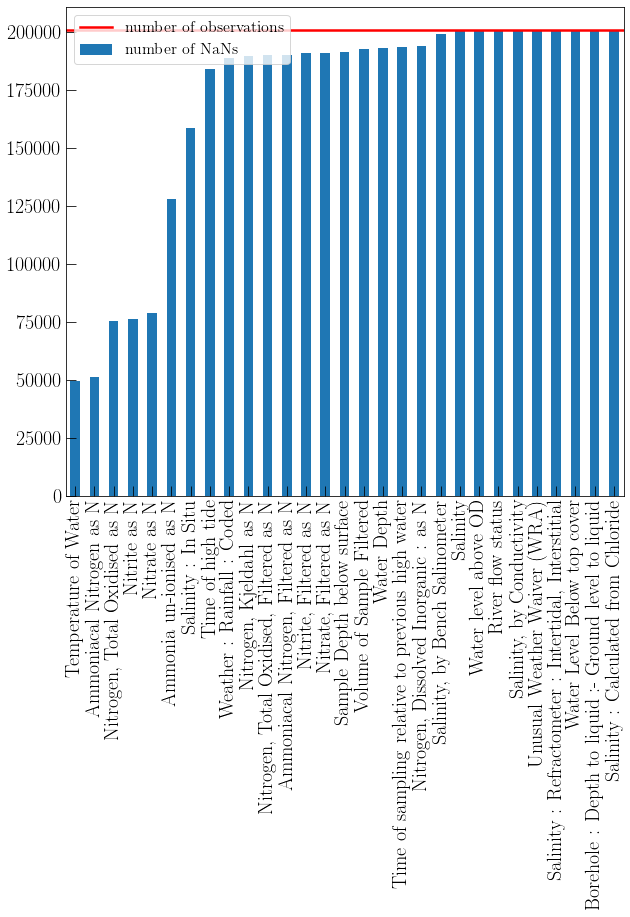

In [33]:
missing = df_sub_piv_enc.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
f, ax = plt.subplots(figsize=(10,9))


missing.plot.bar(label="number of NaNs");
plt.axhline(y=200886, color="red", label="number of observations")
plt.legend(fontsize=16)

In [34]:
# Asking less then 50% being NaNs

In [35]:
df_sub_piv_nans = df_sub_piv_enc.dropna(thresh=df_sub_piv_enc.shape[0]*0.10,axis=1)

In [36]:
df_sub_piv_nans

,place,month,yr,Date,lat,lon,Ammonia un-ionised as N,Ammoniacal Nitrogen as N,Nitrate as N,Nitrite as N,...,water_RIVER / RUNNING SURFACE WATER,water_RUNNING SURFACE WATER SEDIMENT,water_RUNNING SURFACE WATER SEDIMENT - <63UM FRACTION,water_SEA WATER,water_STORM SEWER OVERFLOW DISCHARGE,water_STORM TANK EFFLUENT,water_SURFACE DRAINAGE,water_TRADE EFFLUENT - FRESHWATER RETURNED ABSTRACTED,water_UNCODED,season
31913,SO-F0002151,1,2000,2000-01-04,0.037124,50.914881,0.0010,0.157,3.83,0.0327,...,1,0,0,0,0,0,0,0,0,1
87609,SO-F0011446,1,2000,2000-01-04,-0.390159,51.139273,0.0094,1.380,5.95,0.1500,...,0,0,0,0,0,0,0,0,0,1
78415,SO-F0003200,1,2000,2000-01-04,-0.343427,51.142937,0.0367,12.000,0.90,0.1000,...,0,0,0,0,0,0,0,0,0,1
78583,SO-F0003228,1,2000,2000-01-04,-0.365905,51.146041,0.0076,1.250,9.05,0.3500,...,0,0,0,0,0,0,0,0,0,1
78713,SO-F0003230,1,2000,2000-01-04,-0.353276,51.171494,0.0094,3.080,7.57,0.3300,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92402,SO-F0017448,9,2022,2022-09-20,-0.669417,50.782353,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,1
17371,SO-F0001925,9,2022,2022-09-20,-0.691349,50.779246,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,1
93546,SO-F0017484,9,2022,2022-09-20,0.585767,50.853548,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,1
94295,SO-F0017527,9,2022,2022-09-20,0.591809,50.867184,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,1


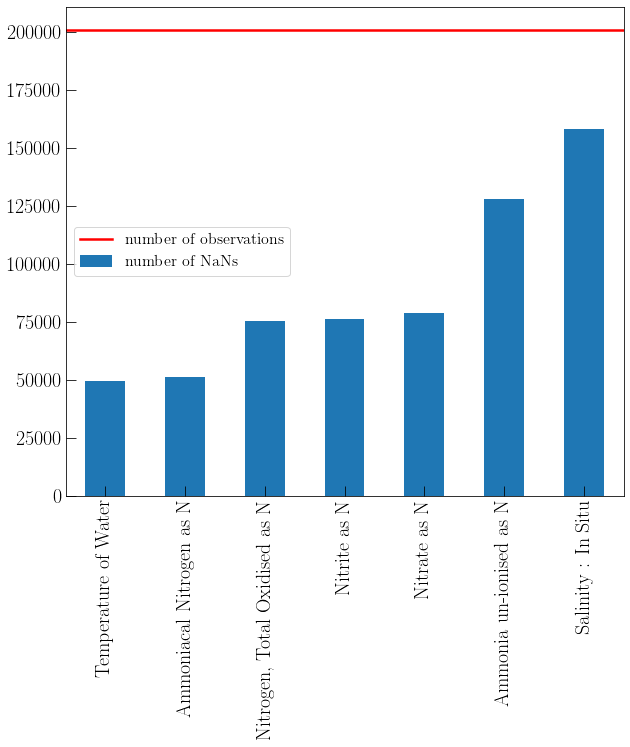

In [37]:
missing = df_sub_piv_nans.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
f, ax = plt.subplots(figsize=(10,9))


missing.plot.bar(label="number of NaNs");
plt.axhline(y=200886, color="red", label="number of observations")
plt.legend(fontsize=16)

In [ ]:
cols_index = [df_piv.columns.get_loc(col) for col in water_determinants]


# 6) Excluding outliers based on quantiles

In [38]:
df_sub_piv_nans.iloc[:, 5::]

,lon,Ammonia un-ionised as N,Ammoniacal Nitrogen as N,Nitrate as N,Nitrite as N,"Nitrogen, Total Oxidised as N",Salinity : In Situ,Temperature of Water,water_ANY BIOTA,water_ANY LEACHATE,...,water_RIVER / RUNNING SURFACE WATER,water_RUNNING SURFACE WATER SEDIMENT,water_RUNNING SURFACE WATER SEDIMENT - <63UM FRACTION,water_SEA WATER,water_STORM SEWER OVERFLOW DISCHARGE,water_STORM TANK EFFLUENT,water_SURFACE DRAINAGE,water_TRADE EFFLUENT - FRESHWATER RETURNED ABSTRACTED,water_UNCODED,season
31913,50.914881,0.0010,0.157,3.83,0.0327,3.86,NaN,8.0,0,0,...,1,0,0,0,0,0,0,0,0,1
87609,51.139273,0.0094,1.380,5.95,0.1500,6.10,NaN,9.0,0,0,...,0,0,0,0,0,0,0,0,0,1
78415,51.142937,0.0367,12.000,0.90,0.1000,1.00,NaN,9.0,0,0,...,0,0,0,0,0,0,0,0,0,1
78583,51.146041,0.0076,1.250,9.05,0.3500,9.40,NaN,9.0,0,0,...,0,0,0,0,0,0,0,0,0,1
78713,51.171494,0.0094,3.080,7.57,0.3300,7.90,NaN,9.0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92402,50.782353,NaN,NaN,NaN,NaN,NaN,34.62,NaN,0,0,...,0,0,0,1,0,0,0,0,0,1
17371,50.779246,NaN,NaN,NaN,NaN,NaN,34.64,NaN,0,0,...,0,0,0,1,0,0,0,0,0,1
93546,50.853548,NaN,NaN,NaN,NaN,NaN,35.20,NaN,0,0,...,0,0,0,1,0,0,0,0,0,1
94295,50.867184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,1,0,0,0,0,0,0,0,0,1


In [39]:
def outliers(df, quantile_low, quantile_up):

    q_low = df.iloc[:, 5::].quantile(quantile_low)
    q_hi  = df.iloc[:, 5::].quantile(quantile_up)

    report_dataframe_out = df.copy()

    report_dataframe_out.iloc[:, 5::] = df[(df.iloc[:, 5::] < q_hi) & (df.iloc[:, 5::]> q_low)].iloc[:, 5::]
    return report_dataframe_out

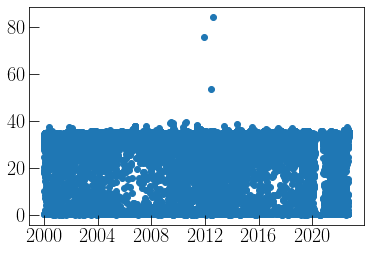

In [40]:
plt.scatter(df_sub_piv_nans["Date"], df_sub_piv_nans["Salinity : In Situ"])


In [41]:
df_sub_piv_nans_out = outliers(df_sub_piv_nans, 0.01, 0.99)

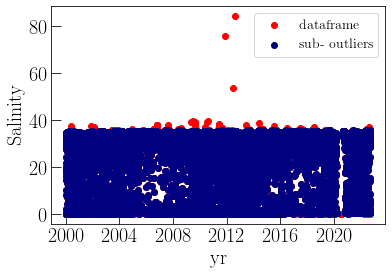

In [42]:
plt.scatter(df_sub_piv_nans["Date"], df_sub_piv_nans["Salinity : In Situ"], label="dataframe", color="red")
plt.scatter(df_sub_piv_nans_out["Date"], df_sub_piv_nans_out["Salinity : In Situ"], label="sub- outliers", color="navy")
plt.xlabel("yr")
plt.ylabel("Salinity")
plt.legend(fontsize = 14)

# 7) covariance

In [43]:
df_sub_piv_nans.drop(columns=df_sub_piv_nans.columns[1:2]).drop(columns=df_sub_piv_nans.columns[3:9])

,place,yr,Nitrite as N,"Nitrogen, Total Oxidised as N",Salinity : In Situ,Temperature of Water,water_ANY BIOTA,water_ANY LEACHATE,water_ANY NON-AQUEOUS LIQUID,water_ANY SEWAGE,...,water_RIVER / RUNNING SURFACE WATER,water_RUNNING SURFACE WATER SEDIMENT,water_RUNNING SURFACE WATER SEDIMENT - <63UM FRACTION,water_SEA WATER,water_STORM SEWER OVERFLOW DISCHARGE,water_STORM TANK EFFLUENT,water_SURFACE DRAINAGE,water_TRADE EFFLUENT - FRESHWATER RETURNED ABSTRACTED,water_UNCODED,season
31913,SO-F0002151,2000,0.0327,3.86,NaN,8.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
87609,SO-F0011446,2000,0.1500,6.10,NaN,9.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
78415,SO-F0003200,2000,0.1000,1.00,NaN,9.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
78583,SO-F0003228,2000,0.3500,9.40,NaN,9.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
78713,SO-F0003230,2000,0.3300,7.90,NaN,9.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92402,SO-F0017448,2022,NaN,NaN,34.62,NaN,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17371,SO-F0001925,2022,NaN,NaN,34.64,NaN,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
93546,SO-F0017484,2022,NaN,NaN,35.20,NaN,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
94295,SO-F0017527,2022,NaN,NaN,NaN,NaN,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [44]:
corrmat = df_sub_piv_nans.drop(columns=df_sub_piv_nans.columns[1:2]).drop(columns=df_sub_piv_nans.columns[3:9]).corr().dropna(how="all", axis="columns").dropna(how="all", axis="rows")


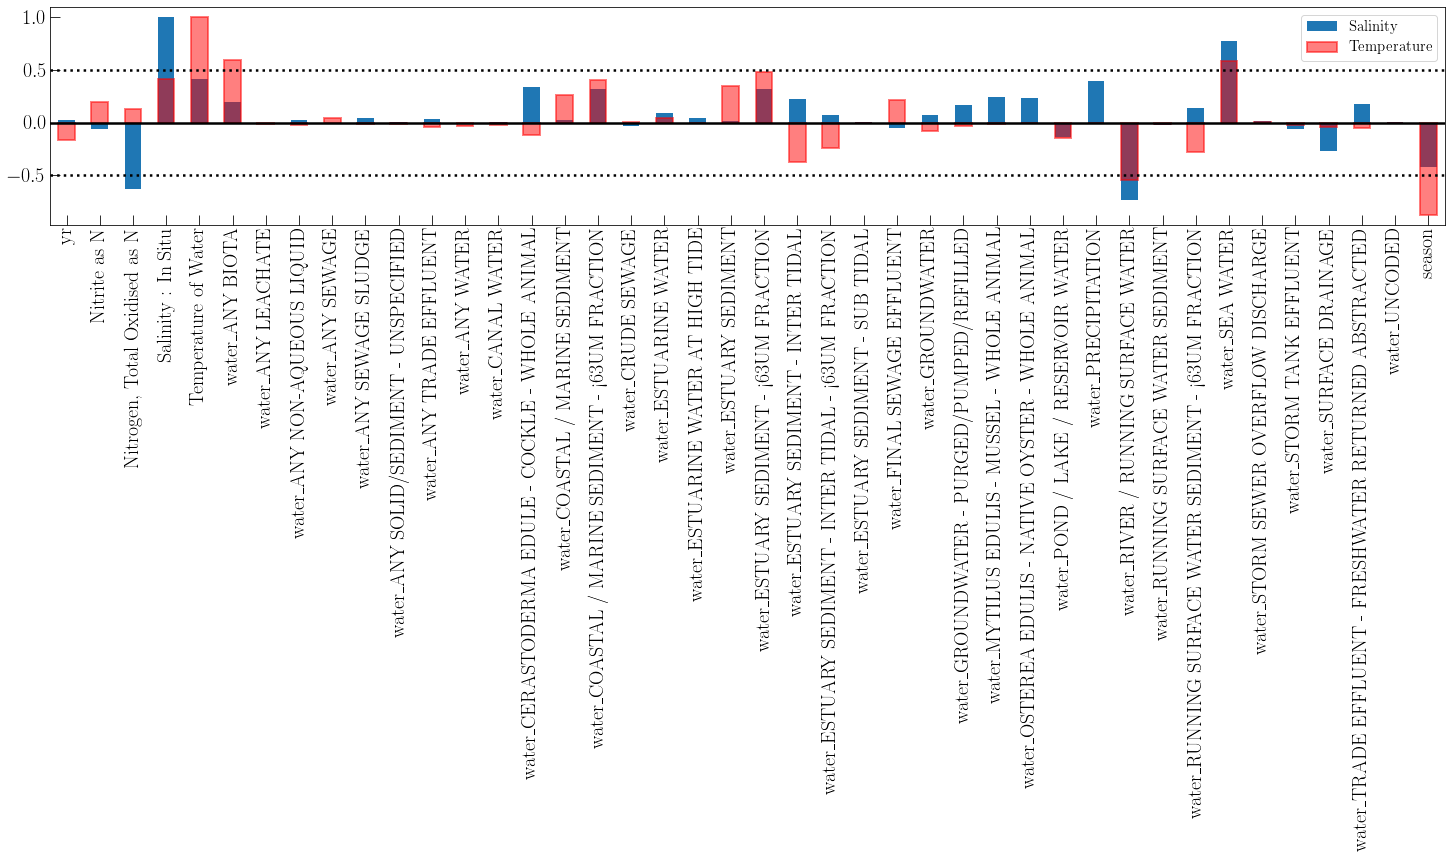

In [45]:
corrmat.corr()['Salinity : In Situ'].plot.bar(figsize=(25,4), alpha=1, label="Salinity")
corrmat.corr()['Temperature of Water'].plot.bar(figsize=(25,4), alpha=0.5, color="red", edgecolor="red", linewidth=2, label="Temperature")
plt.axhline(y=0, color="black")
plt.axhline(y=0.5, color="black", linestyle=":")
plt.axhline(y=-0.5, color="black", linestyle=":")
plt.legend(fontsize=15)

In [46]:
corrmat = df_sub_piv_nans.drop(columns=df_sub_piv_nans.columns[1:2]).corr().dropna(how="all", axis="columns").dropna(how="all", axis="rows")





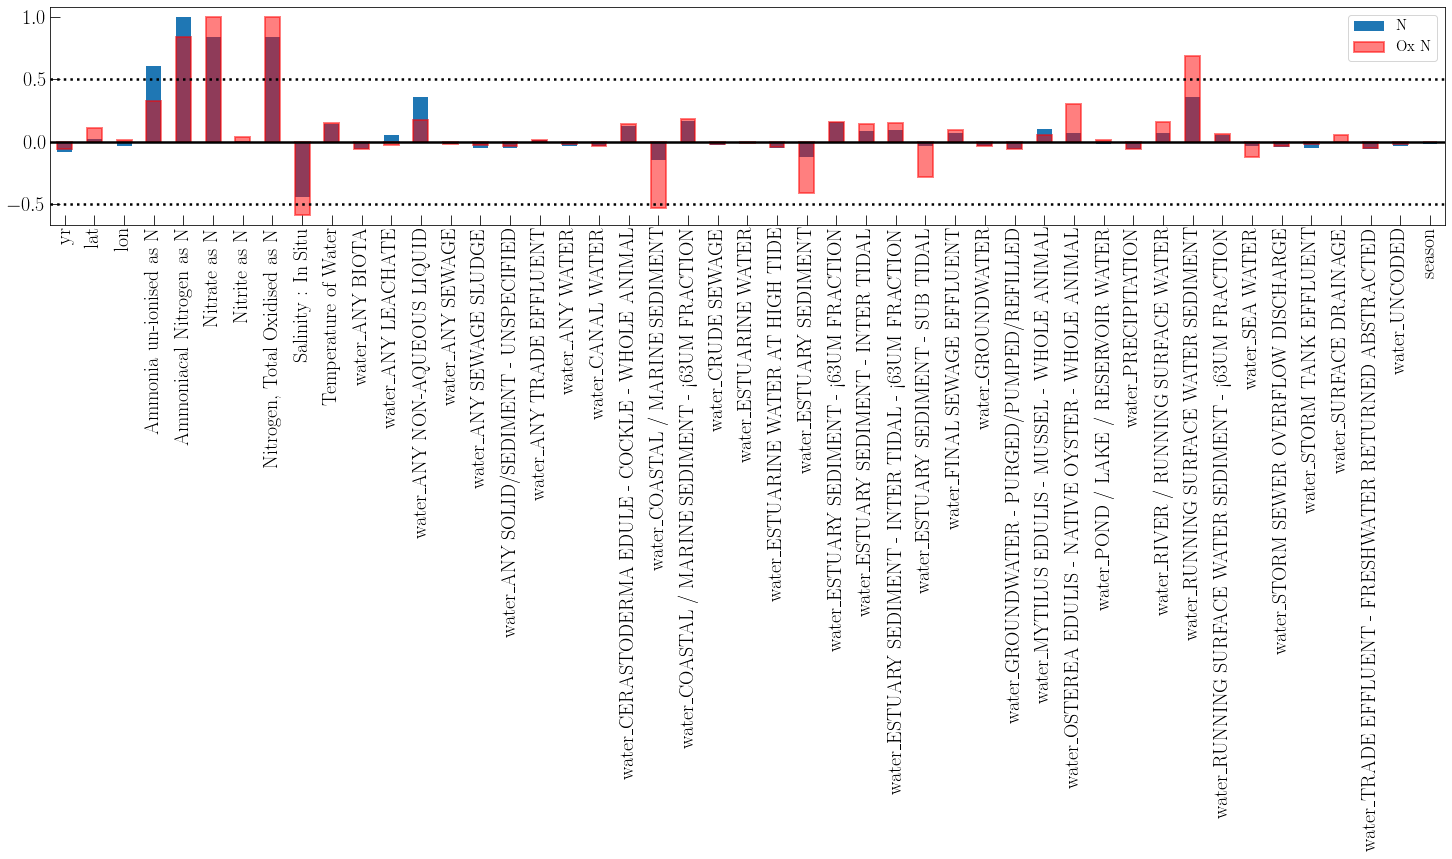

In [47]:
corrmat.corr()['Ammoniacal Nitrogen as N'].plot.bar(figsize=(25,4), alpha=1, label="N")
corrmat.corr()['Nitrogen, Total Oxidised as N'].plot.bar(figsize=(25,4), alpha=0.5, color="red", edgecolor="red", linewidth=2, label="Ox N")

plt.legend(fontsize=15)
plt.axhline(y=0, color="black")
plt.axhline(y=0.5, color="black", linestyle=":")
plt.axhline(y=-0.5, color="black", linestyle=":")

# Rivers in England

In [48]:
import folium


m = folium.Map(location=[ 50.80, -1.0],  zoom_start=12)

In [49]:
m

In [50]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [51]:
rivers = gpd.read_file('/home/nannil/WaterQuality/data/HydroNode.shp')


In [52]:
rivers_course = gpd.read_file('/home/nannil/WaterQuality/data/WatercourseLink.shp')


In [53]:
rivers_hydro = gpd.read_file('/home/nannil/WaterQuality/HydroRIVERS_v10_eu_shp/HydroRIVERS_v10_eu.shp')


In [54]:
rivers = rivers.to_crs(4326)

In [55]:
rivers_course = rivers_course.to_crs(4326)

In [56]:
rivers

,identifier,formOfNode,geometry
0,57E9CF9F-CF1E-40F5-B716-4C686300F057,junction,POINT Z (-0.82283 60.78968 0.00000)
1,9E0FED98-5626-4F16-9D4A-03CAFD557EBF,junction,POINT Z (-0.81696 60.79080 0.00000)
2,B4FA903D-AE2C-4727-8A4F-9EF1FA8058F3,source,POINT Z (-0.81391 60.82420 0.00000)
3,C63FC5FC-F267-4E23-9BE0-A12A40049756,junction,POINT Z (-0.81414 60.80422 0.00000)
4,46917A70-CDE4-4D0C-A5CE-3D4BA911D122,source,POINT Z (-0.81286 60.80379 0.00000)
...,...,...,...
193651,84704DF3-BEB5-4E91-AA16-A6F1AC86A6F1,source,POINT Z (-5.59227 50.13531 0.00000)
193652,CA4543E5-741D-4E80-A6DB-24B6BC08E26D,inapplicable,POINT Z (-5.59051 50.11405 0.00000)
193653,9E8A4FD2-0443-4148-BEC6-5A4F3EAF069D,inapplicable,POINT Z (-5.58558 50.10463 0.00000)
193654,D891A66C-C1CF-443C-8C8A-3C3394AA4040,inapplicable,POINT Z (-5.58746 50.13085 0.00000)


In [57]:
rivers_course

,name1,identifier,startNode,endNode,form,flow,fictitious,length,name2,geometry
0,None,8B684B32-21C7-441D-B0E8-E5B4999C51A7,D45C4203-CD27-43D4-81B4-39613012C9D2,F6D5ED97-B786-4DCC-89CA-41CDC6AC31EE,inlandRiver,in direction,false,382,None,"LINESTRING Z (-0.85720 60.79550 0.00000, -0.85..."
1,None,713B5482-1749-4B41-9638-953530B5E9B5,A75E8351-A8C6-46A7-BB91-433CC0025B93,133E84E2-6050-4CEA-9D5E-C6AAD25DBF72,inlandRiver,in direction,false,424,None,"LINESTRING Z (-0.85175 60.79501 0.00000, -0.85..."
2,None,1A9AC6C1-5A2C-4A7A-9960-299BA434F589,E8C6E44F-F869-4281-93C0-8B347352EE6F,B87E85C2-426D-4C72-8908-E468A52C8160,inlandRiver,in direction,false,468,None,"LINESTRING Z (-0.85258 60.78808 0.00000, -0.85..."
3,None,6FBB6845-19AD-47E6-AA6A-DAACA05D5A33,B87E85C2-426D-4C72-8908-E468A52C8160,ECDC3ADA-4444-4058-984B-8FE53B6A6DEE,lake,in direction,false,60,None,"LINESTRING Z (-0.84879 60.79146 0.00000, -0.84..."
4,None,240AF7D6-0879-41BA-94A7-5BC8CA51D813,ECDC3ADA-4444-4058-984B-8FE53B6A6DEE,133E84E2-6050-4CEA-9D5E-C6AAD25DBF72,inlandRiver,in direction,false,121,None,"LINESTRING Z (-0.84846 60.79197 0.00000, -0.84..."
...,...,...,...,...,...,...,...,...,...,...
189423,None,BA6259FE-B0BF-480F-940B-D1A3AF94FB53,70CA6F87-839F-4A13-8ADD-9BDBA7CBB2E3,6AE0EF96-AE85-4ECE-BC4A-DB01DF1CCCF4,inlandRiver,in direction,false,232,None,"LINESTRING Z (-5.61162 50.14568 0.00000, -5.61..."
189424,None,46B9001D-D5F9-4885-B5D1-EE7F638D1B29,09711227-814F-40FF-94F9-651BC7F56706,6AE0EF96-AE85-4ECE-BC4A-DB01DF1CCCF4,inlandRiver,in direction,false,1380,None,"LINESTRING Z (-5.60657 50.15168 0.00000, -5.60..."
189425,None,23CB8E2B-9B03-4407-954A-A1144DCFF191,80A8EF9B-A733-4E70-95B2-E2192D24F5CC,F27F194F-CD11-465B-A345-1DD588CFD8FD,inlandRiver,in direction,false,732,None,"LINESTRING Z (-5.56621 50.16697 0.00000, -5.56..."
189426,None,05B527D6-E3E6-4239-8D67-8E07EFFD0330,EDCAC7D8-98A8-42D5-9F80-A72268376704,ACC56CAC-0930-44CD-8FA5-680E01340D2B,inlandRiver,in direction,false,568,None,"LINESTRING Z (-5.65049 50.16166 0.00000, -5.65..."


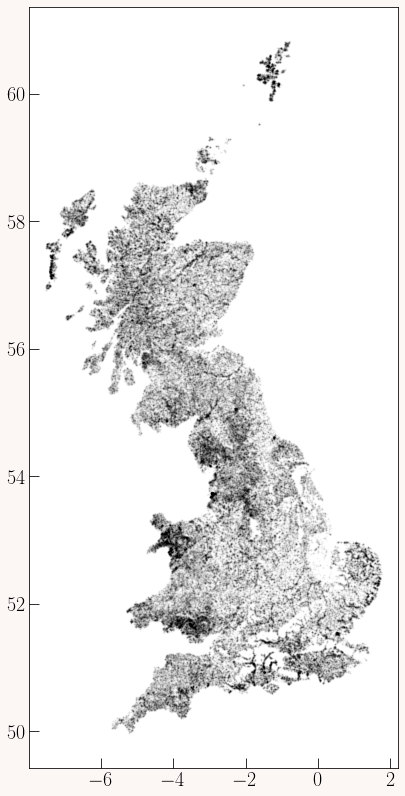

In [58]:

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(10, 14)
rivers.plot(ax = ax, color='black', markersize=1, alpha=0.03)
plt.show()

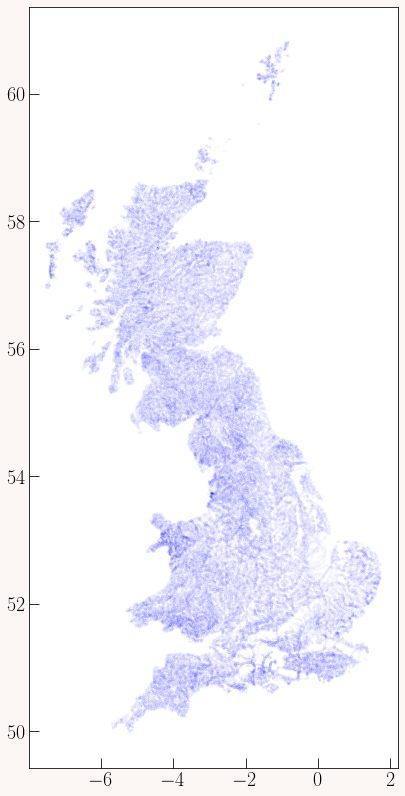

In [59]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(10, 14)
rivers_course.plot(ax = ax, color='blue', markersize=1, alpha=0.03)

plt.show()

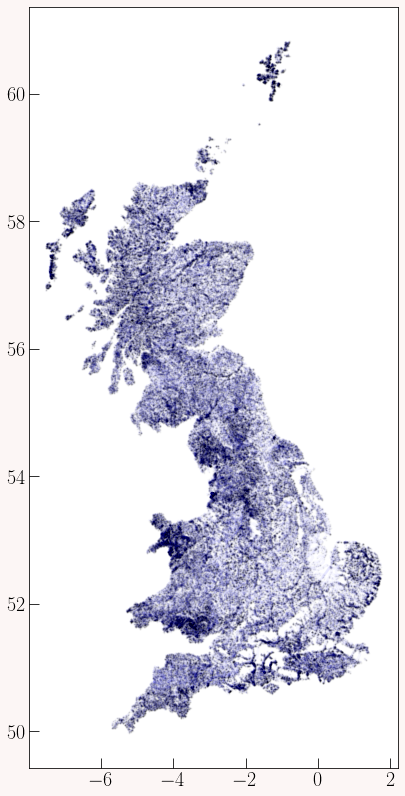

In [60]:

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(10, 14)
rivers_course.plot(ax = ax, color='blue', markersize=1, alpha=0.03)
rivers.plot(ax = ax, color='black', markersize=1, alpha=0.03)

plt.show()

In [61]:
uk_district = gpd.read_file('/home/nannil/WaterQuality/Distribution/Districts.shp')


PO_district_oi = ["PO1", "PO2", "PO3", "PO5", "PO4", "PO6", "PO9", "PO10", "PO11"]

PO_district = uk_district[(uk_district['name'].isin(PO_district_oi) )].geometry

PO_district = PO_district.to_crs(4326)

<AxesSubplot:>

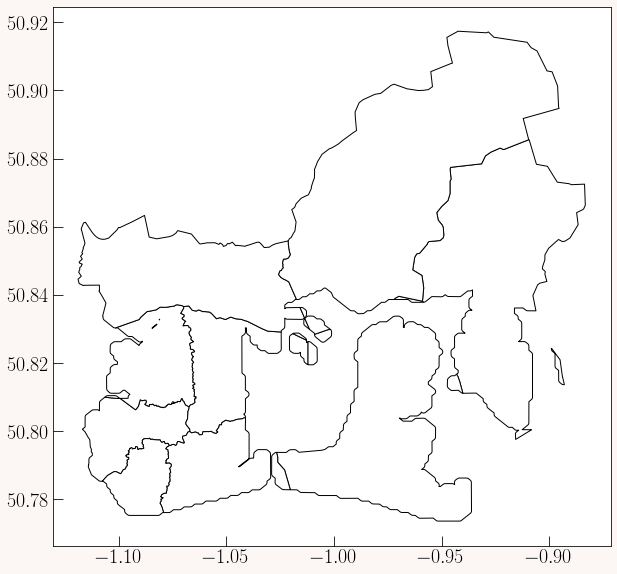

In [62]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(10, 14)
PO_district.plot(ax = ax, color='white', edgecolor='black')


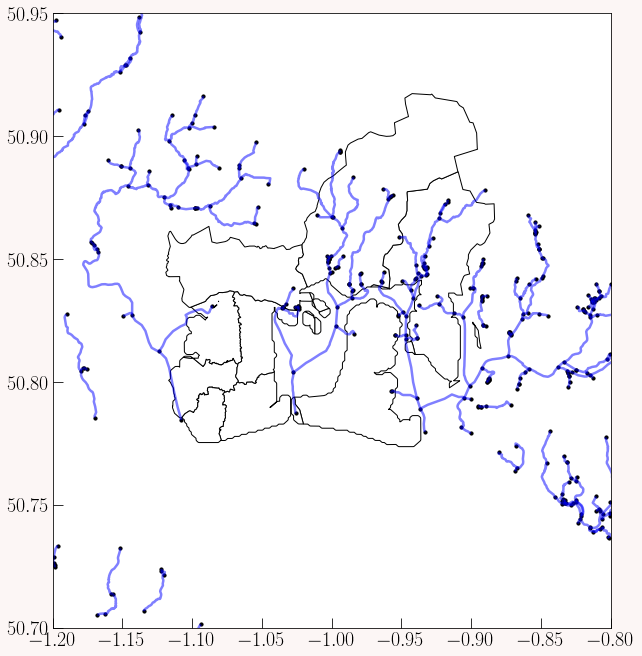

In [63]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(10, 14)

PO_district.plot(ax = ax, color='white', edgecolor='black')
rivers_course.plot(ax = ax, color='blue', markersize=1, alpha=0.5)
rivers.plot(ax = ax, color='black', markersize=10, alpha=1)

plt.xlim(-1.20, -0.8)
plt.ylim(50.7, 50.95)
plt.show()

In [64]:
np.shape(PO_district)

(9,)

In [65]:
mask_location = []

for i in range(8):
    mask_location.append(np.where(rivers.geometry.within(PO_district.iloc[i])==True))


In [66]:
mask_location_course = []

for i in range(8):
    mask_location_course.append(np.where(rivers_course.geometry.intersects(PO_district.iloc[i])==True))


In [67]:
mask_location = np.concatenate((mask_location), axis=1)

In [68]:
mask_location_course = np.concatenate((mask_location_course), axis=1)

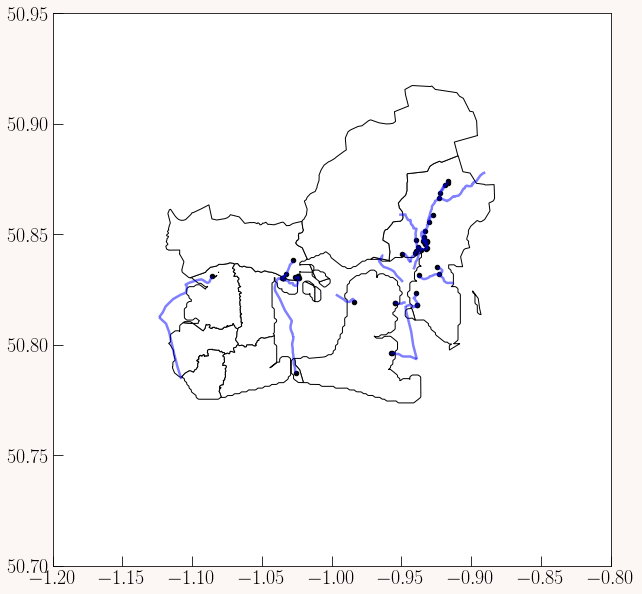

In [69]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(10, 14)

PO_district.plot(ax = ax, color='white', edgecolor='black')
rivers_course.iloc[mask_location_course.flatten()].plot(ax = ax, color='blue', markersize=10, alpha=0.5)
rivers.iloc[mask_location.flatten()].plot(ax = ax, color='black', markersize=20, alpha=1)

plt.xlim(-1.20, -0.8)
plt.ylim(50.7, 50.95)
plt.show()

In [70]:
## Io ti dico i punti che voglio analizzare, tu mi dici che river ci sono costrunedo un poligono che li contiene tutti

In [71]:
list_loc_langstone_estuary = ["SO-G0003493", "SO-G0016920","SO-G0003484","SO-G0016918","SO-G0015927",\
                              "SO-G0003468","SO-G0003467","SO-G0016921"]

list_loc_langstone_freshwater = ["SO-G0003616", "SO-G0003625"]


list_loc_langstone_bkg = ["SO-G0003368", "SO-G0003508","SO-G0003484","SO-G0016873","SO-Y0003370"]




In [72]:
df_langstone_report = \
df_sub_piv_nans \
[df_sub_piv_nans["place"].isin(list_loc_langstone_estuary)| \
 df_sub_piv_nans["place"].isin(list_loc_langstone_freshwater) | \
  df_sub_piv_nans["place"].isin(list_loc_langstone_bkg)]

In [73]:
gdf_ll = gpd.GeoDataFrame(geometry=gpd.points_from_xy(df_langstone_report["lat"], \
                                                      df_langstone_report["lon"]))


In [74]:
from shapely.geometry import Polygon


In [75]:

polygon_geom = Polygon(gdf_ll.envelope)
crs = 'epsg:4326'
polygon = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom]).convex_hull   



import folium
m = folium.Map([50.80, -1.0], zoom_start=10.48)
folium.GeoJson(polygon).add_to(m)
folium.LatLngPopup().add_to(m)
m

In [76]:
mask_location = np.where(rivers.geometry.within(polygon.iloc[0])==True)
mask_location_course = (np.where(rivers_course.geometry.intersects(polygon.iloc[0])==True))



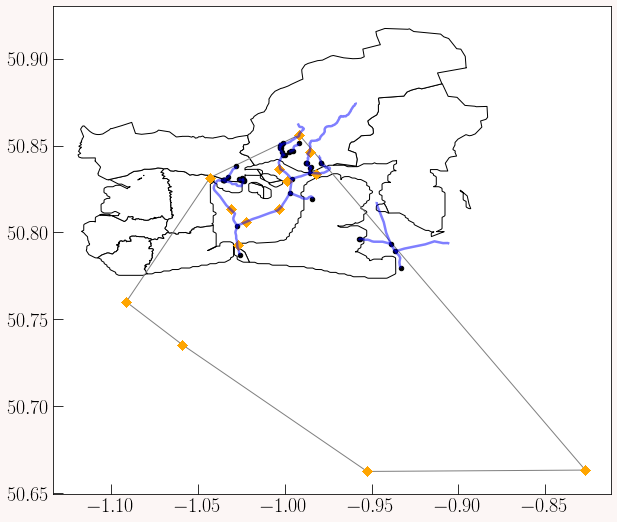

In [77]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(10, 20)

PO_district.plot(ax = ax, color='white', edgecolor='black')
polygon.plot(ax = ax, color='None', edgecolor='grey')

rivers_course.iloc[mask_location_course].plot(ax = ax, color='blue', markersize=10, alpha=0.5)
rivers.iloc[mask_location].plot(ax = ax, color='black', markersize=20, alpha=1)
gdf_ll.plot(ax=ax, color='orange', markersize=35, marker="D")




plt.show()

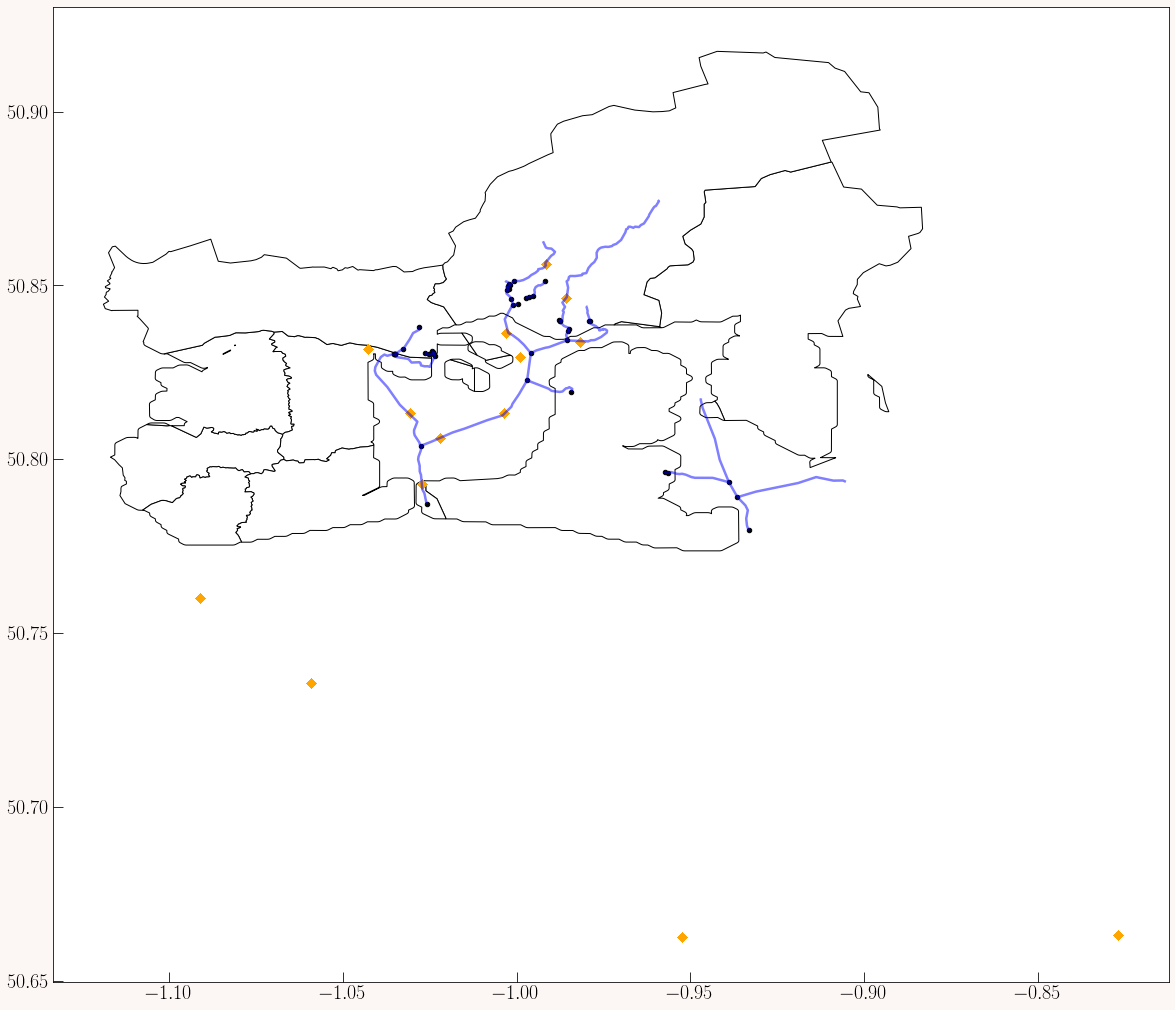

In [78]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(20, 20)

PO_district.plot(ax = ax, color='white', edgecolor='black')

rivers_course.iloc[mask_location_course].plot(ax = ax, color='blue', markersize=10, alpha=0.5)
rivers.iloc[mask_location].plot(ax = ax, color='black', markersize=20, alpha=1)
gdf_ll.plot(ax=ax, color='orange', markersize=35, marker="D")




plt.show()

In [79]:
# verificare se un punto e sul river e between gli stessi due punti

In [80]:
rivers_course.iloc[mask_location_course]

,name1,identifier,startNode,endNode,form,flow,fictitious,length,name2,geometry
140398,Emsworth Channel,E0BC1C42-6BE9-4601-999A-FE4C72FDE4D2,E7299E24-8541-4360-A8D6-033CE68F5DB0,692E693F-1836-4485-AD28-E5B2D5508C6F,tidalRiver,in direction,false,2748,None,"LINESTRING Z (-0.94697 50.81754 0.00000, -0.94..."
140401,None,5CE7AB31-9806-4529-8B9E-078B82BD45FD,692E693F-1836-4485-AD28-E5B2D5508C6F,6150006D-3588-4016-8519-EA6F1E90B2E1,tidalRiver,in direction,false,509,None,"LINESTRING Z (-0.93894 50.79341 0.00000, -0.93..."
140402,Chichester Channel,03DD4FA2-C436-4313-9DBE-57ACCCFED7FC,DFC08D4B-B2AF-46A5-8CF4-76D4249AF8B7,6150006D-3588-4016-8519-EA6F1E90B2E1,tidalRiver,in direction,false,2360,None,"LINESTRING Z (-0.90528 50.79352 0.00000, -0.90..."
140403,Emsworth Channel,AA857B50-59FF-4846-A157-521B8291DB00,6150006D-3588-4016-8519-EA6F1E90B2E1,3E97C274-843E-4721-B509-2786607B49C3,tidalRiver,in direction,false,1114,None,"LINESTRING Z (-0.93648 50.78911 0.00000, -0.93..."
140414,Dip Rithe,4CD94F0F-05D6-44BC-B1E1-75707BFE3790,70E15415-4E64-496F-94CE-2ABAFC6C5543,692E693F-1836-4485-AD28-E5B2D5508C6F,tidalRiver,in direction,false,1317,None,"LINESTRING Z (-0.95650 50.79611 0.00000, -0.95..."
140415,None,AADED317-34C5-45BD-9888-1067AC8824B0,AFAB9763-4D73-4517-ADD1-D9D689DC362D,70E15415-4E64-496F-94CE-2ABAFC6C5543,inlandRiver,in direction,false,84,None,"LINESTRING Z (-0.95739 50.79647 0.00000, -0.95..."
140424,None,A3F66492-BBB7-4029-983D-8825C0D72707,3EE02762-78C7-487E-B6BD-99F9B4AE2FD1,F39A8F46-32A4-46B0-8CF9-26176D9F2933,lake,in direction,false,10,None,"LINESTRING Z (-0.97901 50.83980 0.00000, -0.97..."
140425,None,724577ED-37D6-4505-B8BA-99337E5C2FAC,93E1ECC9-D79F-47B3-9F1F-5FA368C1ADC5,3EE02762-78C7-487E-B6BD-99F9B4AE2FD1,inlandRiver,in direction,false,480,None,"LINESTRING Z (-0.97956 50.84393 0.00000, -0.97..."
140429,None,75E9014B-4069-48B8-B8D6-49264941C813,B70C09C8-865B-4D58-A0C2-F0D636278978,DD447F81-49EE-41FB-BB9D-64230B02EB1F,inlandRiver,in direction,false,4962,None,"LINESTRING Z (-0.95938 50.87459 0.00000, -0.95..."
140430,None,FB5918DE-AD74-4621-B4AA-417C6624B1B4,D02E0FF0-7BAC-46A0-A4D6-FC6BEC26C4FF,AFC595AA-345F-4633-BBE9-AD60E94A985B,tidalRiver,in direction,false,107,None,"LINESTRING Z (-0.99968 50.84473 0.00000, -1.00..."


In [81]:
gdf_ll_buff = gdf_ll.copy()

In [82]:
lang_riv = rivers_course.iloc[mask_location_course].to_crs(4326)

In [83]:
gdf_ll_buff['geometry'] = gdf_ll.geometry.buffer(0.0045)
# is a radius in lat-long!!!!

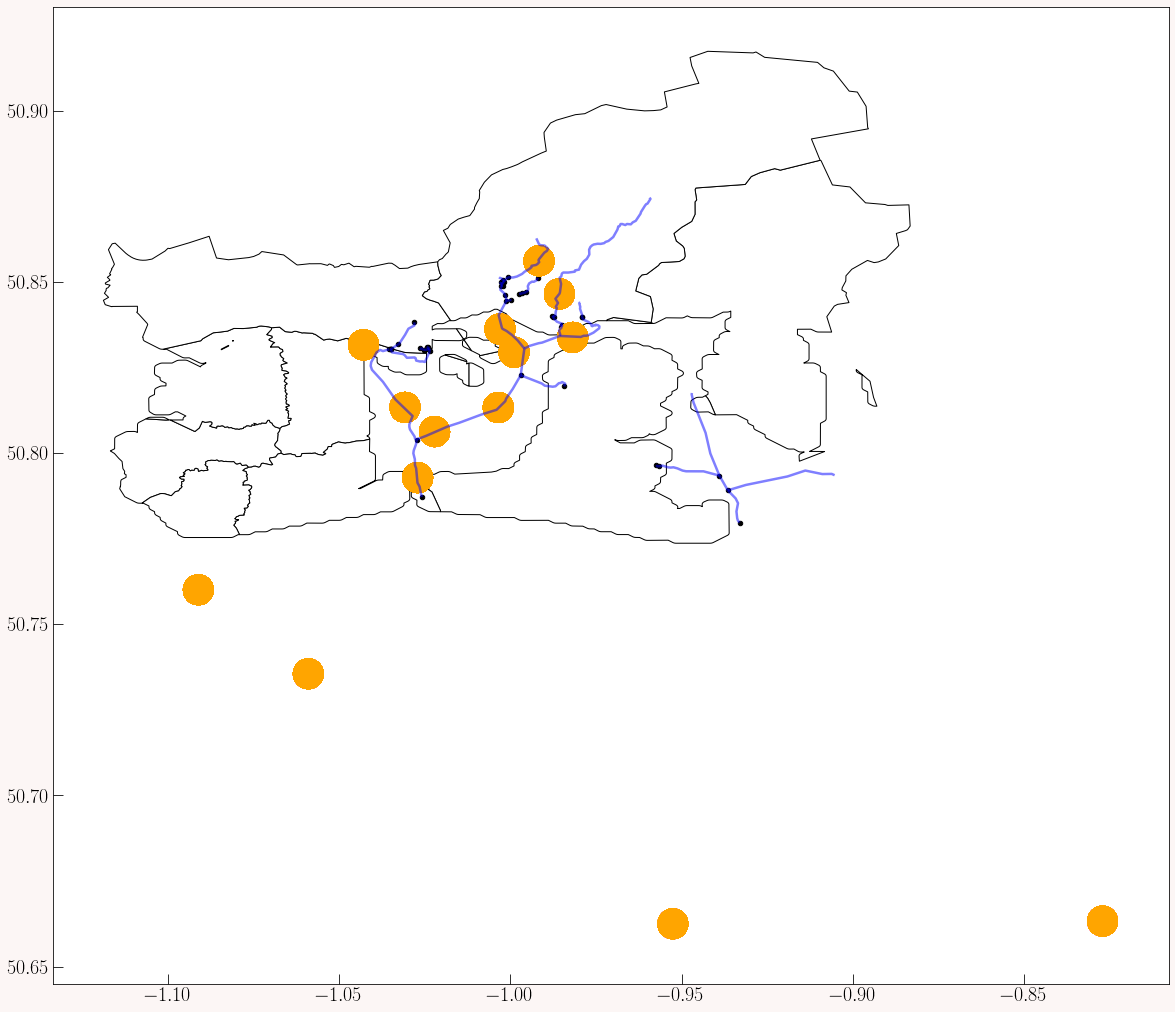

In [84]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(20, 20)

PO_district.plot(ax = ax, color='white', edgecolor='black')

rivers_course.iloc[mask_location_course].plot(ax = ax, color='blue', markersize=10, alpha=0.5)
rivers.iloc[mask_location].plot(ax = ax, color='black', markersize=20, alpha=1)
gdf_ll_buff.plot(ax=ax, color='orange')




plt.show()

In [85]:
join = gpd.sjoin(gdf_ll_buff, lang_riv, how = 'inner', op ='intersects')


/home/nannil/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/home/nannil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  """Entry point for launching an IPython kernel.


In [86]:
gdf_ll_buff

,geometry
0,"POLYGON ((-0.98118 50.84649, -0.98120 50.84605..."
1,"POLYGON ((-0.98713 50.85616, -0.98715 50.85572..."
2,"POLYGON ((-0.94803 50.66248, -0.94805 50.66204..."
3,"POLYGON ((-0.82251 50.66327, -0.82253 50.66283..."
4,"POLYGON ((-1.08665 50.76005, -1.08667 50.75961..."
...,...
2311,"POLYGON ((-1.03840 50.83161, -1.03842 50.83117..."
2312,"POLYGON ((-0.99903 50.81329, -0.99905 50.81285..."
2313,"POLYGON ((-1.02259 50.79281, -1.02261 50.79237..."
2314,"POLYGON ((-0.94803 50.66248, -0.94805 50.66204..."


In [87]:
join

,geometry,index_right,name1,identifier,startNode,endNode,form,flow,fictitious,length,name2
0,"POLYGON ((-0.98118 50.84649, -0.98120 50.84605...",140429,None,75E9014B-4069-48B8-B8D6-49264941C813,B70C09C8-865B-4D58-A0C2-F0D636278978,DD447F81-49EE-41FB-BB9D-64230B02EB1F,inlandRiver,in direction,false,4962,None
14,"POLYGON ((-0.98118 50.84649, -0.98120 50.84605...",140429,None,75E9014B-4069-48B8-B8D6-49264941C813,B70C09C8-865B-4D58-A0C2-F0D636278978,DD447F81-49EE-41FB-BB9D-64230B02EB1F,inlandRiver,in direction,false,4962,None
27,"POLYGON ((-0.98118 50.84649, -0.98120 50.84605...",140429,None,75E9014B-4069-48B8-B8D6-49264941C813,B70C09C8-865B-4D58-A0C2-F0D636278978,DD447F81-49EE-41FB-BB9D-64230B02EB1F,inlandRiver,in direction,false,4962,None
36,"POLYGON ((-0.98118 50.84649, -0.98120 50.84605...",140429,None,75E9014B-4069-48B8-B8D6-49264941C813,B70C09C8-865B-4D58-A0C2-F0D636278978,DD447F81-49EE-41FB-BB9D-64230B02EB1F,inlandRiver,in direction,false,4962,None
51,"POLYGON ((-0.98118 50.84649, -0.98120 50.84605...",140429,None,75E9014B-4069-48B8-B8D6-49264941C813,B70C09C8-865B-4D58-A0C2-F0D636278978,DD447F81-49EE-41FB-BB9D-64230B02EB1F,inlandRiver,in direction,false,4962,None
...,...,...,...,...,...,...,...,...,...,...,...
2259,"POLYGON ((-1.02259 50.79281, -1.02261 50.79237...",143827,Langstone Channel,435CF905-9D33-4156-AD2D-2EE884F02E8C,41B1C30B-C5B6-4A0B-821E-9C5154E4A9D1,18C2F5B8-7023-4F9F-A952-1DFD70D14768,tidalRiver,in direction,false,1890,None
2271,"POLYGON ((-1.02259 50.79281, -1.02261 50.79237...",143827,Langstone Channel,435CF905-9D33-4156-AD2D-2EE884F02E8C,41B1C30B-C5B6-4A0B-821E-9C5154E4A9D1,18C2F5B8-7023-4F9F-A952-1DFD70D14768,tidalRiver,in direction,false,1890,None
2291,"POLYGON ((-1.02259 50.79281, -1.02261 50.79237...",143827,Langstone Channel,435CF905-9D33-4156-AD2D-2EE884F02E8C,41B1C30B-C5B6-4A0B-821E-9C5154E4A9D1,18C2F5B8-7023-4F9F-A952-1DFD70D14768,tidalRiver,in direction,false,1890,None
2298,"POLYGON ((-1.02259 50.79281, -1.02261 50.79237...",143827,Langstone Channel,435CF905-9D33-4156-AD2D-2EE884F02E8C,41B1C30B-C5B6-4A0B-821E-9C5154E4A9D1,18C2F5B8-7023-4F9F-A952-1DFD70D14768,tidalRiver,in direction,false,1890,None


In [88]:
#colors_new = cm.Spectral(np.linspace(0, 1, len(np.unique(join["index_right"].values))))
colors_new = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080']

In [89]:
for i in range(len(np.unique(join["index_right"].values))):

    print("same river:", np.unique(df_langstone_report.iloc[join[join["index_right"].values==np.unique(join["index_right"].values)[i]].index]["place"]))

same river: ['SO-G0003616']
same river: ['SO-G0003625']
same river: ['SO-G0015927' 'SO-G0016920']
same river: ['SO-G0003468']
same river: ['SO-G0003468' 'SO-G0016921']
same river: ['SO-G0003467' 'SO-G0003468']
same river: ['SO-G0003467']
same river: ['SO-G0003467']
same river: ['SO-G0003493']
same river: ['SO-G0003484' 'SO-G0016918']


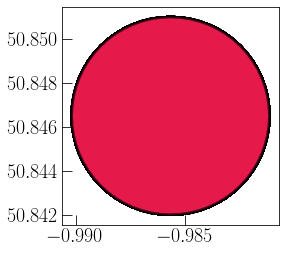

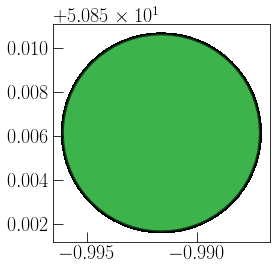

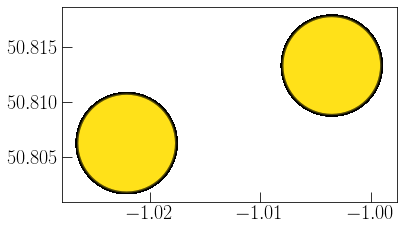

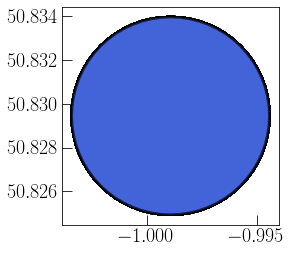

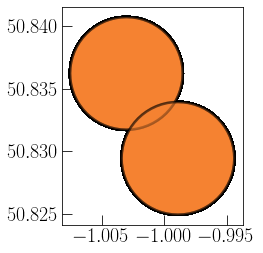

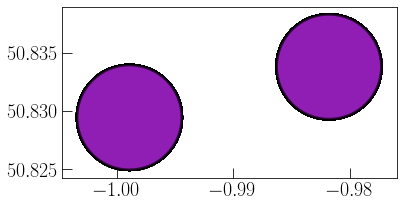

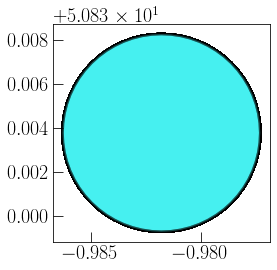

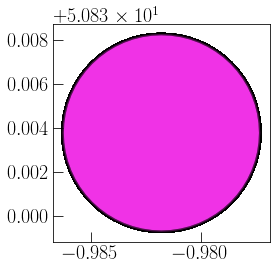

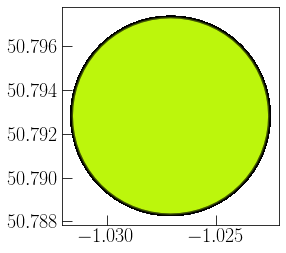

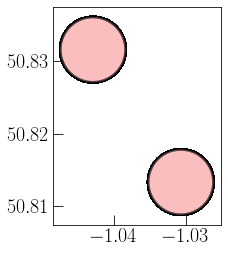

In [90]:
for i in range(len(np.unique(join["index_right"].values))):
    ax = gdf_ll_buff.iloc[join[join["index_right"].values == np.unique(join["index_right"].values)[i]].index]\
    .plot( facecolor=colors_new[i], edgecolor="black", linewidth=2.5, markersize=10, alpha =0.5, \
         label=str(np.unique(df_langstone_report.iloc[join[join["index_right"].values==np.unique(join["index_right"].values)[i]].index]["place"])))


plt.show()

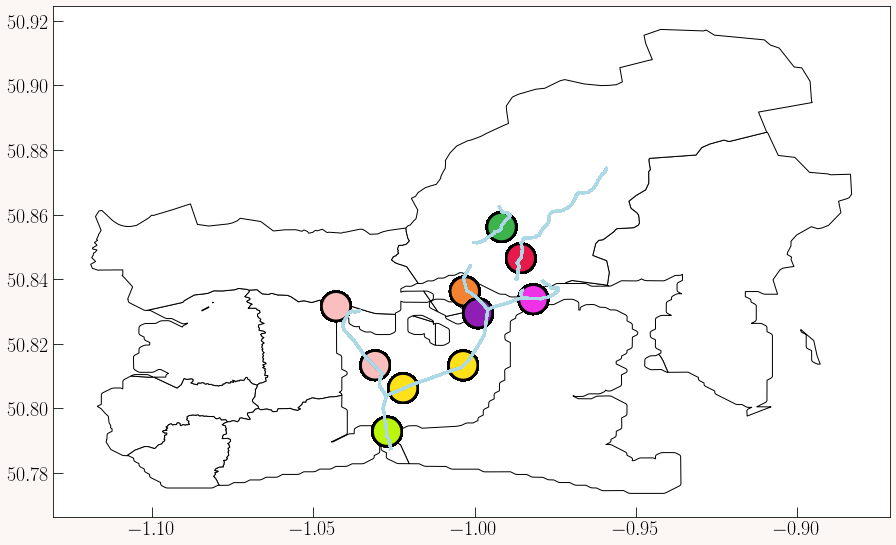

In [91]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(15, 10)

PO_district.plot(ax = ax, color='white', edgecolor='black')


for i in range(len(np.unique(join["index_right"].values))):
    lang_riv.loc[join[join["index_right"].values==np.unique(join["index_right"].values)[i]]["index_right"]].plot(ax = ax, color='lightblue', markersize=20, alpha=1)
    gdf_ll_buff.iloc[join[join["index_right"].values == np.unique(join["index_right"].values)[i]].index]\
    .plot(ax=ax,  facecolor=colors_new[i], edgecolor="black", linewidth=2.5)
    
    
    


<AxesSubplot:>

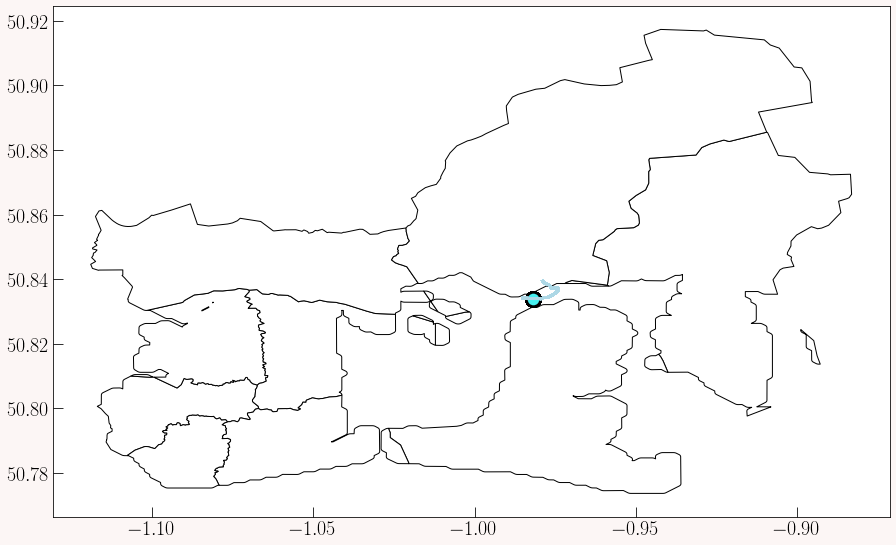

In [92]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(15, 10)

PO_district.plot(ax = ax, color='white', edgecolor='black')


lang_riv.loc[join[join["index_right"].values==np.unique(join["index_right"].values)[6]]["index_right"]].plot(ax = ax, color='lightblue', markersize=20, alpha=1)
gdf_ll.iloc[join[join["index_right"].values == np.unique(join["index_right"].values)[6]].index]\
    .plot(ax=ax,  facecolor=colors_new[6], edgecolor="black", linewidth=2.5, markersize=200)

<AxesSubplot:>

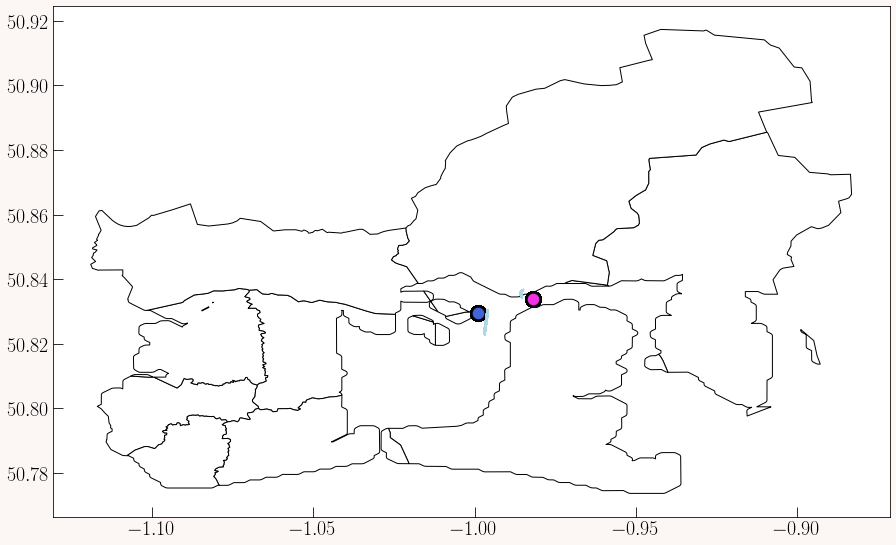

In [93]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(15, 10)

PO_district.plot(ax = ax, color='white', edgecolor='black')


lang_riv.loc[join[join["index_right"].values==np.unique(join["index_right"].values)[3]]["index_right"]].plot(ax = ax, color='lightblue', markersize=20, alpha=1)
gdf_ll.iloc[join[join["index_right"].values == np.unique(join["index_right"].values)[3]].index]\
    .plot(ax=ax,  facecolor=colors_new[3], edgecolor="black", linewidth=2.5, markersize=200)


lang_riv.loc[join[join["index_right"].values==np.unique(join["index_right"].values)[7]]["index_right"]].plot(ax = ax, color='lightblue', markersize=20, alpha=1)
gdf_ll.iloc[join[join["index_right"].values == np.unique(join["index_right"].values)[7]].index]\
    .plot(ax=ax,  facecolor=colors_new[7], edgecolor="black", linewidth=2.5, markersize=200)

In [94]:
sea = gpd.read_file('/home/nannil/WaterQuality/Limits_and_boundaries.shp')


In [132]:
GBR = gpd.read_file('/home/nannil/WaterQuality/GBR_adm0.dbf')


<AxesSubplot:>

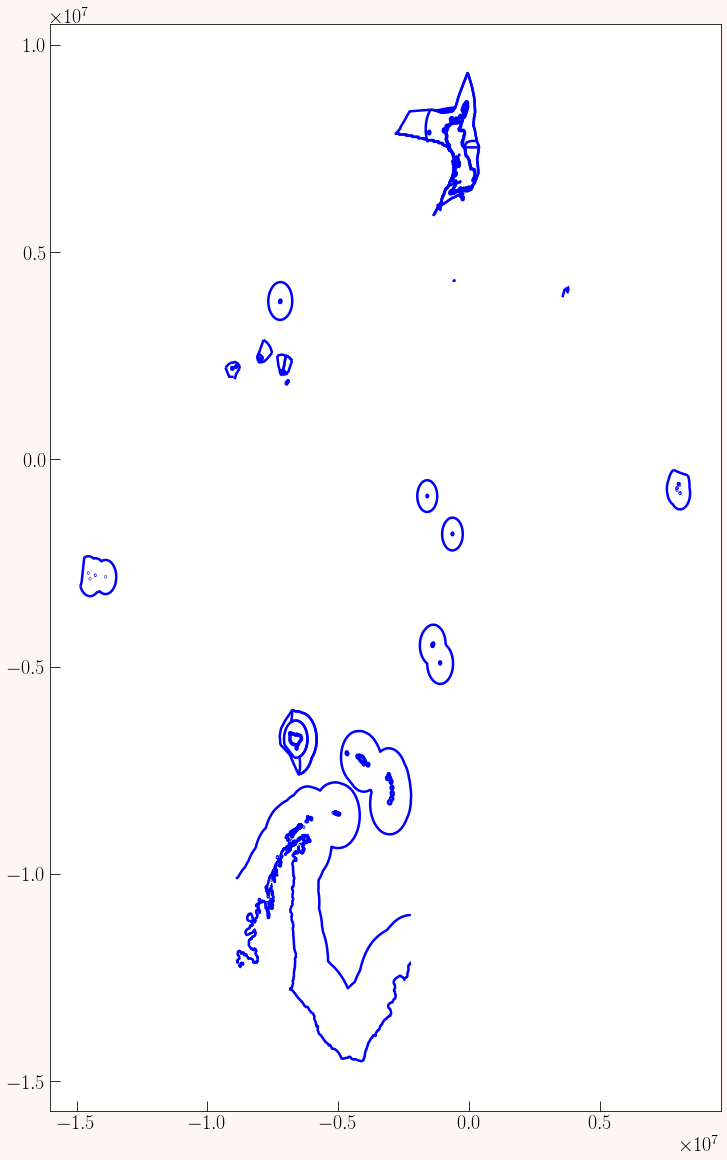

In [97]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(20, 20)

sea.plot(ax = ax, color='blue', edgecolor='black')

PO_district.plot(ax = ax, color='white', edgecolor='black')


In [103]:
sea.to_crs(4326)

,objectid,coastal_st,nature_of_,horizontal,date,source,boundary_c,globalid,st_length_,geometry
0,112,United Kingdom,Closing Line,WGS 84,2022-07-22,Admiralty Maritime Data Solutions,N/A,{F2FE687B-8186-4D72-A6A0-7D9AD933707C},1.433758e+03,"LINESTRING (-5.34876 51.87451, -5.35204 51.86682)"
1,113,United Kingdom,Closing Line,WGS 84,2022-07-22,Admiralty Maritime Data Solutions,N/A,{E1ED1307-860B-455D-AB4B-0127C890C1BE},4.378752e+03,"LINESTRING (-4.73107 52.11807, -4.69767 52.13083)"
2,538,South Georgia and the South Sandwich Island,Territorial Sea Limit,WGS 84,2022-07-22,Admiralty Maritime Data Solutions,N/A,{ADC640F7-F1CA-4231-80F4-33A2206ABC9F},2.807136e+05,"LINESTRING (-27.91552 -56.41627, -27.91478 -56..."
3,114,United Kingdom,Closing Line,WGS 84,2022-07-22,Admiralty Maritime Data Solutions,N/A,{A74E818C-62A5-46CA-B9FD-67BF3D93D77D},1.812009e+03,"LINESTRING (-4.62622 53.26931, -4.63515 53.27745)"
4,18,United Kingdom,Boundary,WGS 84,2022-07-22,Admiralty Maritime Data Solutions,Faroe Islands,{FC5808A0-F32C-4AD5-90D0-A7C01EC89B31},2.235619e+05,"LINESTRING (-11.27430 60.04722, -12.29370 60.1..."
...,...,...,...,...,...,...,...,...,...,...
572,573,Saint Helena,Exclusive Economic Zone Limit,WGS 84,2022-07-22,Admiralty Maritime Data Solutions,N/A,{C5F95950-0604-4DDB-8938-28D02CE624BA},2.477808e+06,"LINESTRING (-2.18917 -15.66560, -2.18919 -15.6..."
573,574,Saint Helena,Territorial Sea Limit,WGS 84,2022-07-22,Admiralty Maritime Data Solutions,N/A,{127B287E-F364-4EBA-B7C1-AE76EC057F0E},1.950232e+05,"LINESTRING (-5.54668 -16.16476, -5.54747 -16.1..."
574,575,Tristan da Cunha,Exclusive Economic Zone Limit,WGS 84,2022-07-22,Admiralty Maritime Data Solutions,N/A,{85ABD054-D527-4FC2-B34E-5CA004FA5676},4.197606e+06,"LINESTRING (-8.04936 -37.28184, -8.04914 -37.2..."
575,576,Tristan da Cunha,Territorial Sea Limit,WGS 84,2022-07-22,Admiralty Maritime Data Solutions,N/A,{CAE0E9FF-F913-4EC1-89EC-3689E30497FC},3.458770e+05,"LINESTRING (-12.91590 -37.41969, -12.91637 -37..."


(50.0, 51.0)

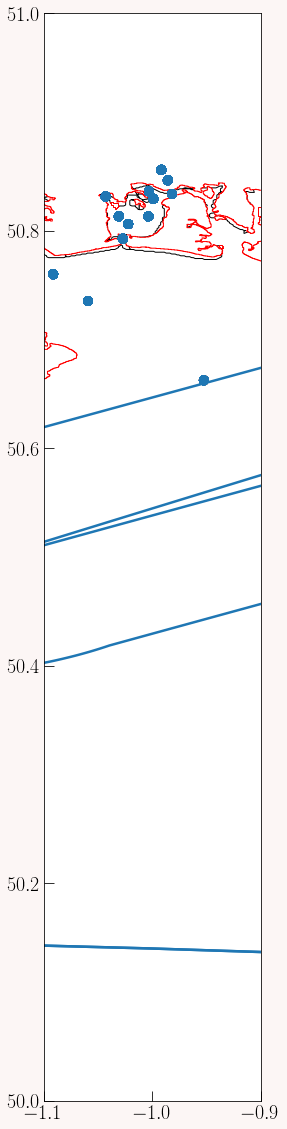

In [133]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(20, 20)
sea.plot(ax=ax)
PO_district.plot(ax = ax, color='white', edgecolor='black')
GBR.plot(ax = ax, color='white', edgecolor='red')

gdf_ll_buff.plot(ax=ax)
plt.xlim(-1.1,-0.9)
plt.ylim(50.,51)

In [ ]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(20, 20)
sea.plot(ax=ax)
PO_district.plot(ax = ax, color='white', edgecolor='black')
gdf_ll_buff.plot(ax=ax)
plt.xlim(-30,10)
plt.ylim(44,64)

In [109]:
sea = sea.to_crs(4326)

In [110]:
join_sea = gpd.sjoin(gdf_ll_buff, sea, how = 'inner', op ='intersects')


/home/nannil/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/home/nannil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  """Entry point for launching an IPython kernel.


In [111]:
join_sea

,geometry,index_right,objectid,coastal_st,nature_of_,horizontal,date,source,boundary_c,globalid,st_length_
2,"POLYGON ((-0.94803 50.66248, -0.94805 50.66204...",340,312,United Kingdom,Closing Line,WGS 84,2022-07-22,Admiralty Maritime Data Solutions,N/A,{017C26C2-74B3-4110-9446-995CFFF59FF2},46442.253804
16,"POLYGON ((-0.94803 50.66248, -0.94805 50.66204...",340,312,United Kingdom,Closing Line,WGS 84,2022-07-22,Admiralty Maritime Data Solutions,N/A,{017C26C2-74B3-4110-9446-995CFFF59FF2},46442.253804
40,"POLYGON ((-0.94803 50.66248, -0.94805 50.66204...",340,312,United Kingdom,Closing Line,WGS 84,2022-07-22,Admiralty Maritime Data Solutions,N/A,{017C26C2-74B3-4110-9446-995CFFF59FF2},46442.253804
47,"POLYGON ((-0.94803 50.66248, -0.94805 50.66204...",340,312,United Kingdom,Closing Line,WGS 84,2022-07-22,Admiralty Maritime Data Solutions,N/A,{017C26C2-74B3-4110-9446-995CFFF59FF2},46442.253804
55,"POLYGON ((-0.94803 50.66248, -0.94805 50.66204...",340,312,United Kingdom,Closing Line,WGS 84,2022-07-22,Admiralty Maritime Data Solutions,N/A,{017C26C2-74B3-4110-9446-995CFFF59FF2},46442.253804
...,...,...,...,...,...,...,...,...,...,...,...
2254,"POLYGON ((-0.94803 50.66248, -0.94805 50.66204...",340,312,United Kingdom,Closing Line,WGS 84,2022-07-22,Admiralty Maritime Data Solutions,N/A,{017C26C2-74B3-4110-9446-995CFFF59FF2},46442.253804
2264,"POLYGON ((-0.94803 50.66248, -0.94805 50.66204...",340,312,United Kingdom,Closing Line,WGS 84,2022-07-22,Admiralty Maritime Data Solutions,N/A,{017C26C2-74B3-4110-9446-995CFFF59FF2},46442.253804
2280,"POLYGON ((-0.94803 50.66248, -0.94805 50.66204...",340,312,United Kingdom,Closing Line,WGS 84,2022-07-22,Admiralty Maritime Data Solutions,N/A,{017C26C2-74B3-4110-9446-995CFFF59FF2},46442.253804
2296,"POLYGON ((-0.94803 50.66248, -0.94805 50.66204...",340,312,United Kingdom,Closing Line,WGS 84,2022-07-22,Admiralty Maritime Data Solutions,N/A,{017C26C2-74B3-4110-9446-995CFFF59FF2},46442.253804


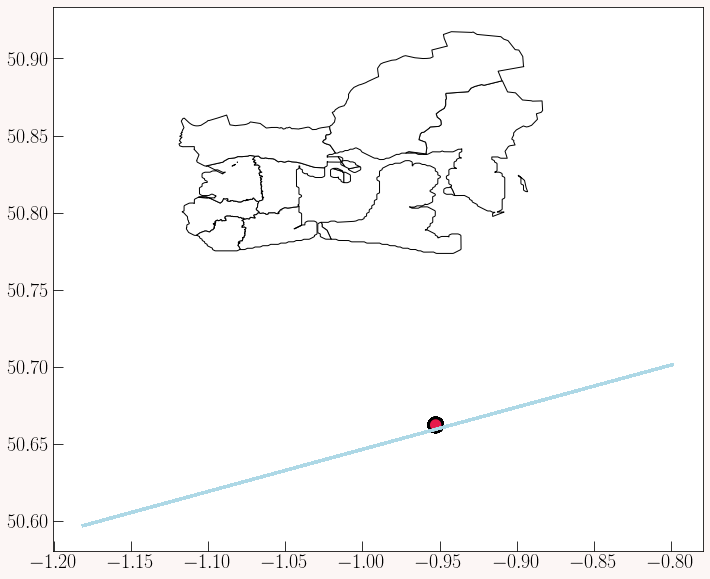

In [115]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(15, 10)

PO_district.plot(ax = ax, color='white', edgecolor='black')


for i in range(len(np.unique(join_sea["index_right"].values))):
    sea.loc[join_sea[join_sea["index_right"].values==np.unique(join_sea["index_right"].values)[i]]["index_right"]].plot(ax = ax, color='lightblue', markersize=20, alpha=1)
    gdf_ll_buff.iloc[join_sea[join_sea["index_right"].values == np.unique(join_sea["index_right"].values)[i]].index]\
    .plot(ax=ax,  facecolor=colors_new[i], edgecolor="black", linewidth=2.5)

# Clustering - DBSCAN

In [134]:
from sklearn.cluster import DBSCAN


In [142]:
df_sub_piv_nans

,place,month,yr,Date,lat,lon,Ammonia un-ionised as N,Ammoniacal Nitrogen as N,Nitrate as N,Nitrite as N,...,water_RIVER / RUNNING SURFACE WATER,water_RUNNING SURFACE WATER SEDIMENT,water_RUNNING SURFACE WATER SEDIMENT - <63UM FRACTION,water_SEA WATER,water_STORM SEWER OVERFLOW DISCHARGE,water_STORM TANK EFFLUENT,water_SURFACE DRAINAGE,water_TRADE EFFLUENT - FRESHWATER RETURNED ABSTRACTED,water_UNCODED,season
31913,SO-F0002151,1,2000,2000-01-04,0.037124,50.914881,0.0010,0.157,3.83,0.0327,...,1,0,0,0,0,0,0,0,0,1
87609,SO-F0011446,1,2000,2000-01-04,-0.390159,51.139273,0.0094,1.380,5.95,0.1500,...,0,0,0,0,0,0,0,0,0,1
78415,SO-F0003200,1,2000,2000-01-04,-0.343427,51.142937,0.0367,12.000,0.90,0.1000,...,0,0,0,0,0,0,0,0,0,1
78583,SO-F0003228,1,2000,2000-01-04,-0.365905,51.146041,0.0076,1.250,9.05,0.3500,...,0,0,0,0,0,0,0,0,0,1
78713,SO-F0003230,1,2000,2000-01-04,-0.353276,51.171494,0.0094,3.080,7.57,0.3300,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92402,SO-F0017448,9,2022,2022-09-20,-0.669417,50.782353,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,1
17371,SO-F0001925,9,2022,2022-09-20,-0.691349,50.779246,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,1
93546,SO-F0017484,9,2022,2022-09-20,0.585767,50.853548,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,1
94295,SO-F0017527,9,2022,2022-09-20,0.591809,50.867184,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,1


## Imputing the mean

In [156]:
# To calculate mean use imputer class
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')


In [171]:
features = list(imp_dataset.drop(columns = [ "place", "Date"]).columns.values)

In [172]:
imp_df = df_sub_piv_nans.copy()

In [173]:
df_sub_piv_nans[features]

,month,yr,lat,lon,Ammonia un-ionised as N,Ammoniacal Nitrogen as N,Nitrate as N,Nitrite as N,"Nitrogen, Total Oxidised as N",Salinity : In Situ,...,water_RIVER / RUNNING SURFACE WATER,water_RUNNING SURFACE WATER SEDIMENT,water_RUNNING SURFACE WATER SEDIMENT - <63UM FRACTION,water_SEA WATER,water_STORM SEWER OVERFLOW DISCHARGE,water_STORM TANK EFFLUENT,water_SURFACE DRAINAGE,water_TRADE EFFLUENT - FRESHWATER RETURNED ABSTRACTED,water_UNCODED,season
31913,1,2000,0.037124,50.914881,0.0010,0.157,3.83,0.0327,3.86,NaN,...,1,0,0,0,0,0,0,0,0,1
87609,1,2000,-0.390159,51.139273,0.0094,1.380,5.95,0.1500,6.10,NaN,...,0,0,0,0,0,0,0,0,0,1
78415,1,2000,-0.343427,51.142937,0.0367,12.000,0.90,0.1000,1.00,NaN,...,0,0,0,0,0,0,0,0,0,1
78583,1,2000,-0.365905,51.146041,0.0076,1.250,9.05,0.3500,9.40,NaN,...,0,0,0,0,0,0,0,0,0,1
78713,1,2000,-0.353276,51.171494,0.0094,3.080,7.57,0.3300,7.90,NaN,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92402,9,2022,-0.669417,50.782353,NaN,NaN,NaN,NaN,NaN,34.62,...,0,0,0,1,0,0,0,0,0,1
17371,9,2022,-0.691349,50.779246,NaN,NaN,NaN,NaN,NaN,34.64,...,0,0,0,1,0,0,0,0,0,1
93546,9,2022,0.585767,50.853548,NaN,NaN,NaN,NaN,NaN,35.20,...,0,0,0,1,0,0,0,0,0,1
94295,9,2022,0.591809,50.867184,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,1


In [174]:
imp_df[features] = imputer.fit_transform(df_sub_piv_nans[features])


In [175]:
imp_df

,place,month,yr,Date,lat,lon,Ammonia un-ionised as N,Ammoniacal Nitrogen as N,Nitrate as N,Nitrite as N,...,water_RIVER / RUNNING SURFACE WATER,water_RUNNING SURFACE WATER SEDIMENT,water_RUNNING SURFACE WATER SEDIMENT - <63UM FRACTION,water_SEA WATER,water_STORM SEWER OVERFLOW DISCHARGE,water_STORM TANK EFFLUENT,water_SURFACE DRAINAGE,water_TRADE EFFLUENT - FRESHWATER RETURNED ABSTRACTED,water_UNCODED,season
31913,SO-F0002151,1.0,2000.0,2000-01-04,0.037124,50.914881,0.001000,0.15700,3.830000,0.032700,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
87609,SO-F0011446,1.0,2000.0,2000-01-04,-0.390159,51.139273,0.009400,1.38000,5.950000,0.150000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
78415,SO-F0003200,1.0,2000.0,2000-01-04,-0.343427,51.142937,0.036700,12.00000,0.900000,0.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
78583,SO-F0003228,1.0,2000.0,2000-01-04,-0.365905,51.146041,0.007600,1.25000,9.050000,0.350000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
78713,SO-F0003230,1.0,2000.0,2000-01-04,-0.353276,51.171494,0.009400,3.08000,7.570000,0.330000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92402,SO-F0017448,9.0,2022.0,2022-09-20,-0.669417,50.782353,0.006975,4.16217,7.305498,0.138718,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
17371,SO-F0001925,9.0,2022.0,2022-09-20,-0.691349,50.779246,0.006975,4.16217,7.305498,0.138718,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
93546,SO-F0017484,9.0,2022.0,2022-09-20,0.585767,50.853548,0.006975,4.16217,7.305498,0.138718,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
94295,SO-F0017527,9.0,2022.0,2022-09-20,0.591809,50.867184,0.006975,4.16217,7.305498,0.138718,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [176]:
features_db = list(imp_dataset.drop(columns = ["place", "Date", "month", ]).columns.values)

## dimensionality reduction - PCA

In [229]:
from sklearn.decomposition import PCA


In [234]:
pca = PCA(2)


In [235]:
df = pca.fit_transform(imp_df[features_db])


## clustering - KMeans

In [219]:
from sklearn.cluster import KMeans


In [236]:
model = KMeans(n_clusters=10)


In [237]:
model.fit(df)

KMeans(n_clusters=10)

In [241]:
label = model.predict(df)

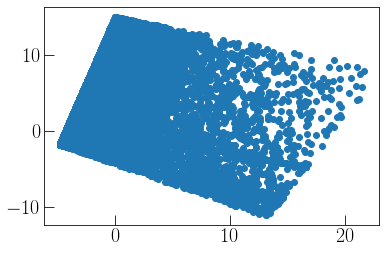

In [242]:
#filter rows of original data
filtered_label0 = df[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

In [245]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

OSError: [Errno 12] Cannot allocate memory

<Figure size 432x288 with 1 Axes>

## dimensionality reduction

In [211]:
db = DBSCAN(eps=0.2, min_samples=5).fit(imp_df[features_db][::50])


In [212]:
labels = db.labels_

In [213]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)


In [214]:
n_clusters_

6

In [217]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

core_samples_mask[db.core_sample_indices_] = True



## Iterative Imputing

###### It takes an arbitrary Sklearn estimator and tries to impute missing values by modeling other features as a function of features with missing values.


In [ ]:
import pandas as pd
import numpy as np
from fuzzywuzzy import process, fuzz

###### the catalogue is really big, so I'll do a subset here

In [135]:
imp_dataset = df_sub_piv_nans.iloc[::100,:]

In [136]:
imp_dataset

,place,month,yr,Date,lat,lon,Ammonia un-ionised as N,Ammoniacal Nitrogen as N,Nitrate as N,Nitrite as N,...,water_RIVER / RUNNING SURFACE WATER,water_RUNNING SURFACE WATER SEDIMENT,water_RUNNING SURFACE WATER SEDIMENT - <63UM FRACTION,water_SEA WATER,water_STORM SEWER OVERFLOW DISCHARGE,water_STORM TANK EFFLUENT,water_SURFACE DRAINAGE,water_TRADE EFFLUENT - FRESHWATER RETURNED ABSTRACTED,water_UNCODED,season
31913,SO-F0002151,1,2000,2000-01-04,0.037124,50.914881,0.00100,0.157,3.83,0.0327,...,1,0,0,0,0,0,0,0,0,1
154890,SO-G0004196,1,2000,2000-01-06,-1.532188,50.749245,0.00060,0.059,5.72,0.0226,...,1,0,0,0,0,0,0,0,0,1
46706,SO-F0002496,1,2000,2000-01-10,-0.241336,50.962575,0.00100,0.139,8.12,0.2040,...,1,0,0,0,0,0,0,0,0,1
121404,SO-G0003817,1,2000,2000-01-13,-1.180453,51.083311,0.00040,0.030,5.45,0.0040,...,1,0,0,0,0,0,0,0,0,1
142324,SO-G0004024,1,2000,2000-01-17,-1.498085,50.986200,0.00130,0.106,5.35,0.0312,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196958,SO-Y0004421,8,2022,2022-08-18,-1.225253,50.649328,0.00095,0.093,9.73,0.0670,...,1,0,0,0,0,0,0,0,0,0
176773,SO-G0017029,8,2022,2022-08-23,-1.079438,50.778665,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
172338,SO-G0006798,9,2022,2022-09-02,-1.106707,50.846709,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,1
95178,SO-F0017629,9,2022,2022-09-09,-0.361129,50.811011,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,1


In [137]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [138]:
from sklearn.ensemble import RandomForestRegressor


In [139]:
ii_imp = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)

In [140]:
features = list(imp_dataset.loc[:,~imp_dataset.columns.str.startswith('water')].drop(columns = ["place", "Date", "month", "Salinity : In Situ", "Temperature of Water"]).columns.values)

In [141]:
imp_dataset[features] = ii_imp.fit_transform(imp_dataset[features])

KeyboardInterrupt: 

# Dimensionality reduction

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
features_pca =  list(imp_dataset.drop(columns = ["place", "Date", "month", "season"]).columns.values)

In [ ]:
pca = PCA(n_components=5)
df_sub_piv_nans_pca = pca.fit_transform(imp_dataset[features])

In [ ]:
from sklearn.manifold import TSNE


In [ ]:
# We want to get TSNE embedding with 2 dimensions
tsne = TSNE(n_components=2, random_state=0, perplexity=30)
x_tsne = tsne.fit_transform(PCA(n_components=5).fit_transform(df_sub_piv_nans_pca))
# (1000, 2)
# Two dimensions for each of our images
 
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE


In [ ]:
plt.scatter(x_tsne[:,0], x_tsne[:,1], cmap='Spectral',s=1)
plt.colorbar()